Notre Sujet d'etudes est le:Micro Gas Turbine Electrical Energy Prediction,Consultable sur le lien suivant:
https://archive.ics.uci.edu/dataset/994/micro+gas+turbine+electrical+energy+prediction


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

# Analyse de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from mpl_toolkits.mplot3d import Axes3D
import missingno as msno

# Prétraitement et manipulation des données
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
)
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Modèles de régression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, StackingRegressor
)
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Sélection de modèles et recherche d'hyperparamètres
from sklearn.model_selection import (
    train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
)

# Évaluation des modèles
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score, make_scorer
)

# Détection d'anomalies
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

# Autres outils
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [5]:
#chargement du dataset
dataset_ex_1=pd.read_csv('/content/drive/MyDrive/Intelligence_artificiel_project/train/ex_1.csv')
dataset_ex_2=pd.read_csv('/content/drive/MyDrive/Intelligence_artificiel_project/train/ex_20.csv')
dataset_ex_3=pd.read_csv('/content/drive/MyDrive/Intelligence_artificiel_project/train/ex_21.csv')
dataset_ex_4=pd.read_csv('/content/drive/MyDrive/Intelligence_artificiel_project/train/ex_23.csv')
dataset_ex_5=pd.read_csv('/content/drive/MyDrive/Intelligence_artificiel_project/train/ex_24.csv')
dataset_ex_6=pd.read_csv('/content/drive/MyDrive/Intelligence_artificiel_project/train/ex_9.csv')
dataset_list = [dataset_ex_1, dataset_ex_2, dataset_ex_3, dataset_ex_4, dataset_ex_5, dataset_ex_6]
# dataset_list = [dataset_ex_1, dataset_ex_2, dataset_ex_3, dataset_ex_4]
dataset_test_1=pd.read_csv('/content/drive/MyDrive/Intelligence_artificiel_project/test/ex_22.csv')
dataset_test_2=pd.read_csv('/content/drive/MyDrive/Intelligence_artificiel_project/test/ex_4.csv')
# dataset_list = [dataset_ex_1]
# dataset_test_list = [dataset_test_1,dataset_test_2]
dataset_test_list = [dataset_test_1]

In [6]:
#fusion du dataset
#4.1.2
# Concaténer les datasets verticalement (empiler les lignes)
combined_dataset = pd.concat(dataset_list, axis=0)

# Optionnel : Réinitialiser les index pour que l'index soit cohérent
combined_dataset.reset_index(drop=True, inplace=True)

# Concaténer les datasets verticalement (empiler les lignes)
combined_dataset_test = pd.concat(dataset_test_list, axis=0)

# Optionnel : Réinitialiser les index pour que l'index soit cohérent
combined_dataset_test.reset_index(drop=True, inplace=True)
# Afficher un aperçu des données combinées
print(combined_dataset.head())

        time  input_voltage     el_power
0  810.07028           10.0  1228.791720
1  811.06938           10.0  1223.041745
2  812.06848           10.0  1244.960866
3  813.06758           10.0  1229.259058
4  814.06668           10.0  1248.117024


In [7]:
# @title Titre par défaut
#4.1.3.1
combined_dataset.isna()
print(combined_dataset)
#Calcul de la proportion de valeurs manquantes
missing_percent = combined_dataset.isna().mean() * 100
print(f'Proportion de valeurs manquantes:',"\n",missing_percent)

#Décision de traitement (exemple: si plus de 2% des valeurs sont manquantes, imputation)
if missing_percent.max() < 2:
    print(f'Peu de valeurs manquantes, suppression des lignes.')
    combined_dataset.dropna()
else:
    print(f'Valeurs manquantes importantes, imputation avec la médiane.')
    combined_dataset.fillna(combined_dataset.median())  # Imputation avec la médiane pour les colonnes numériques

              time  input_voltage     el_power
0        810.07028          10.00  1228.791720
1        811.06938          10.00  1223.041745
2        812.06848          10.00  1244.960866
3        813.06758          10.00  1229.259058
4        814.06668          10.00  1248.117024
...            ...            ...          ...
52935  12632.84000           7.24  2358.536920
52936  12633.84000           7.24  2481.489028
52937  12634.84000           7.24  2327.054441
52938  12635.84000           7.24  2451.061029
52939  12636.84000           7.24  2336.952994

[52940 rows x 3 columns]
Proportion de valeurs manquantes: 
 time             0.0
input_voltage    0.0
el_power         0.0
dtype: float64
Peu de valeurs manquantes, suppression des lignes.


In [4]:
#4.1.3.2conversion des données

print(f'Types de données avant conversion')
print(combined_dataset.dtypes)

# Conversion de 'time' en type datetime
combined_dataset['time'] = pd.to_datetime(combined_dataset['time'], errors='coerce')  # On force les erreurs à NaT

# Conversion des autres colonnes en float
combined_dataset['input_voltage'] = pd.to_numeric(combined_dataset['input_voltage'], errors='coerce')
combined_dataset['el_power'] = pd.to_numeric(combined_dataset['el_power'], errors='coerce')

print(f'Types de données après conversion')
print(combined_dataset)


Types de données avant conversion
time             float64
input_voltage    float64
el_power         float64
dtype: object
Types de données après conversion
                               time  input_voltage     el_power
0     1970-01-01 00:00:00.000000810          10.00  1228.791720
1     1970-01-01 00:00:00.000000811          10.00  1223.041745
2     1970-01-01 00:00:00.000000812          10.00  1244.960866
3     1970-01-01 00:00:00.000000813          10.00  1229.259058
4     1970-01-01 00:00:00.000000814          10.00  1248.117024
...                             ...            ...          ...
52935 1970-01-01 00:00:00.000012632           7.24  2358.536920
52936 1970-01-01 00:00:00.000012633           7.24  2481.489028
52937 1970-01-01 00:00:00.000012634           7.24  2327.054441
52938 1970-01-01 00:00:00.000012635           7.24  2451.061029
52939 1970-01-01 00:00:00.000012636           7.24  2336.952994

[52940 rows x 3 columns]


In [5]:
#4.1.3.3 Nettoyage de données

# Suppression des doublons s'il y en a
combined_dataset = combined_dataset.drop_duplicates()

# Vérification des valeurs aberrantes
print(f'Valeurs statistiques:')
print(combined_dataset[['input_voltage', 'el_power']].describe())
"""
Indices potentiels de valeurs aberrantes :
**Écart entre le minimum et le premier quartile: Pour certaines colonnes et certains datasets
,l'écart entre le minimum et le premier quartile est relativement important par rapport à
l'écart entre le premier et le troisième quartile. Cela pourrait indiquer la présence de quelques
valeurs très basses.
**Écart entre le troisième quartile et le maximum: De même, un écart important entre le troisième
quartile et le maximum pourrait signaler des valeurs très élevées.
**Valeurs minimales et maximales: Les valeurs minimales et maximales peuvent donner des indications
sur la présence de valeurs extrêmes, mais il faut les interpréter dans le contexte de l'application.
Par exemple, si une tension minimale de 3V est physiquement impossible dans votre système, alors
cette valeur pourrait être considérée comme aberrante.
"""

#Nous allons donc corriger ces petites erreurs dans l'implementation suivante:

# Suppression des doublons
combined_dataset = combined_dataset.drop_duplicates()

# Identification des valeurs aberrantes dans la colonne 'el_power' avec la règle des 3 sigmas
mean_el_power = combined_dataset['el_power'].mean()
std_el_power = combined_dataset['el_power'].std()

# Calcul des z-scores
z_scores = np.abs((combined_dataset['el_power'] - mean_el_power) / std_el_power)
threshold = 3

# Filtrer les lignes avec des valeurs aberrantes dans 'el_power'
combined_dataset = combined_dataset[(z_scores < threshold)]

# Capping des valeurs de 'input_voltage' à un minimum de 3
combined_dataset['input_voltage'] = combined_dataset['input_voltage'].clip(lower=3)

# Affichage des résultats après traitement
print(f'Valeurs statistiques corrigées:')
print(combined_dataset[['input_voltage', 'el_power']].describe())


Valeurs statistiques:
       input_voltage      el_power
count   52940.000000  52940.000000
mean        5.505534   1843.315949
std         2.549721    723.126377
min         3.000000    932.837260
25%         3.000000   1205.743900
50%         4.842105   1605.753998
75%         7.421053   2399.419112
max        10.000000   3249.891217
Valeurs statistiques corrigées:
       input_voltage      el_power
count   52940.000000  52940.000000
mean        5.505534   1843.315949
std         2.549721    723.126377
min         3.000000    932.837260
25%         3.000000   1205.743900
50%         4.842105   1605.753998
75%         7.421053   2399.419112
max        10.000000   3249.891217


In [ ]:
print(combined_dataset.head())

                           time  input_voltage  el_power  hour  day_of_week  \
0 1970-01-01 00:00:00.000000810       0.911695 -0.924879     0            3   
1 1970-01-01 00:00:00.000000811       0.911695 -0.930575     0            3   
2 1970-01-01 00:00:00.000000812       0.911695 -0.908861     0            3   
3 1970-01-01 00:00:00.000000813       0.911695 -0.924416     0            3   
4 1970-01-01 00:00:00.000000814       0.911695 -0.905735     0            3   

   month  power_to_voltage_ratio  
0      1               -1.014460  
1      1               -1.020708  
2      1               -0.996892  
3      1               -1.013953  
4      1               -0.993462  


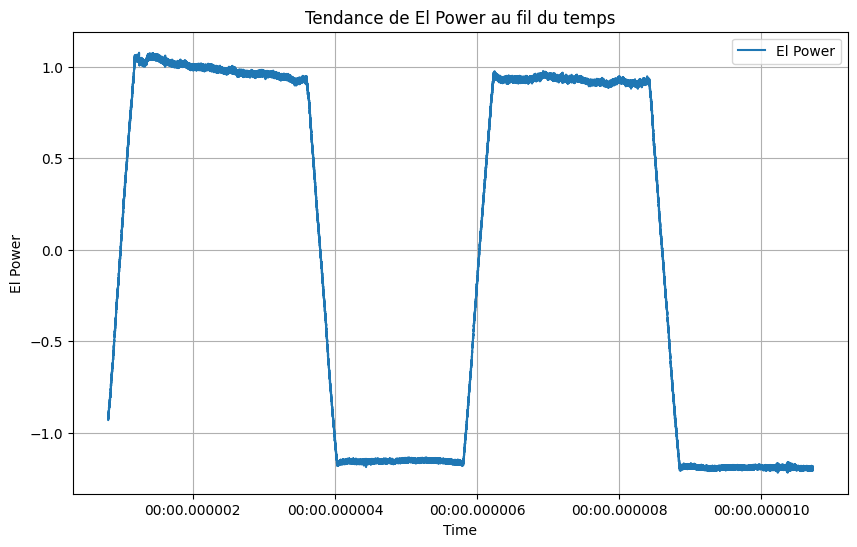

In [ ]:
#4.2 Exemple de graphique linéaire pour visualiser la tendance de 'el_power' au fil du temps(MatPlotlib)
plt.figure(figsize=(10, 6))
plt.plot(combined_dataset['time'], combined_dataset['el_power'], label='El Power')
plt.xlabel('Time')
plt.ylabel('El Power')
plt.title('Tendance de El Power au fil du temps')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Créer un graphique interactif avec Plotly
fig = px.line(combined_dataset, x='time', y='el_power', title='Tendance de El Power au fil du temps')
fig.show()

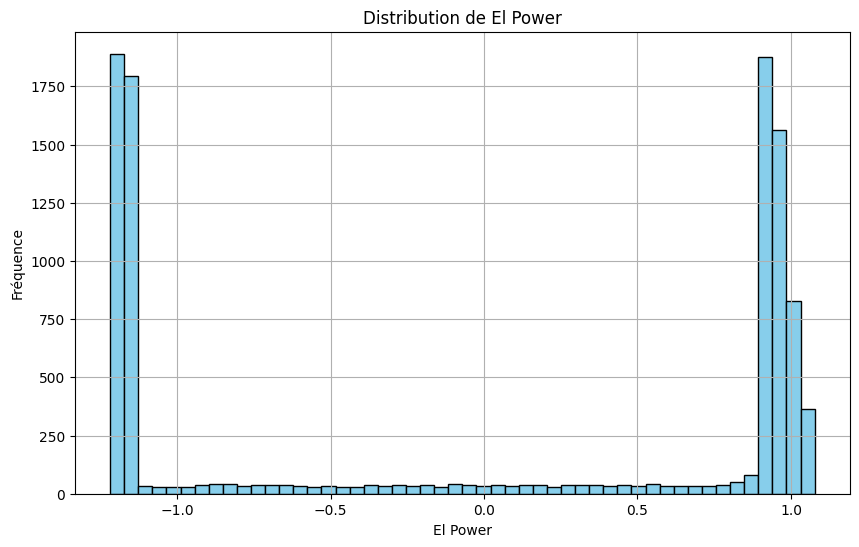

In [ ]:
# Histogramme de visualisation de données(MatPlotlib) Distribution de 'el_power'
plt.figure(figsize=(10, 6))
plt.hist(combined_dataset['el_power'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution de El Power')
plt.xlabel('El Power')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()


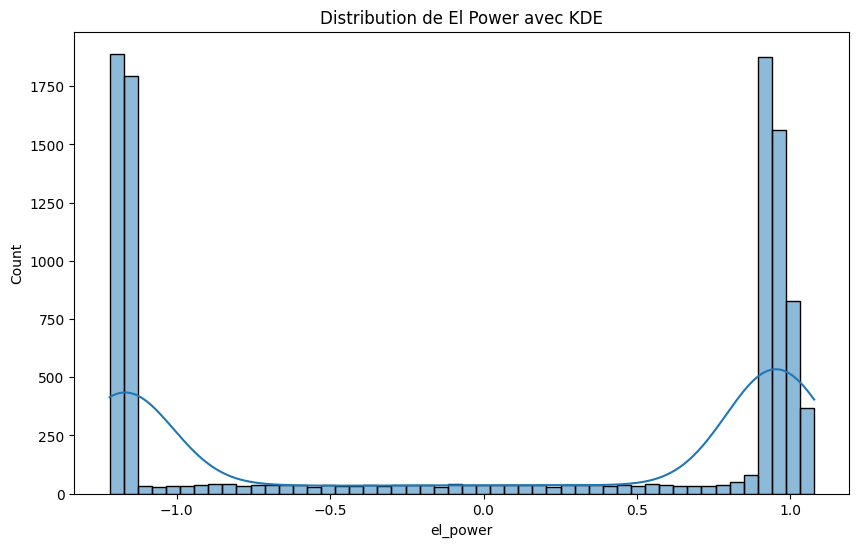

In [ ]:
# Distribution de el_power avec Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(combined_dataset['el_power'], bins=50, kde=True)
plt.title('Distribution de El Power avec KDE')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



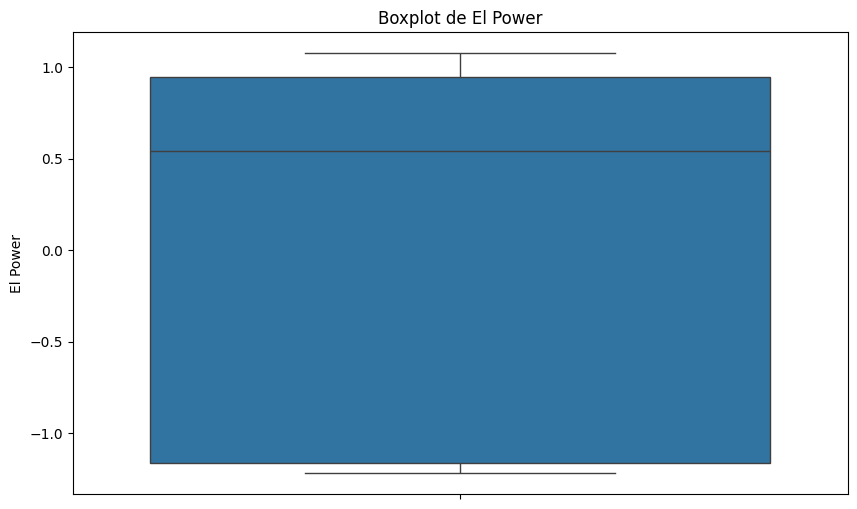

In [ ]:
# Boxplot pour visualiser les valeurs aberrantes dans 'el_power'
plt.figure(figsize=(10, 6))
sns.boxplot(y='el_power', data=combined_dataset)
plt.ylabel('El Power')
plt.title('Boxplot de El Power')
plt.show()


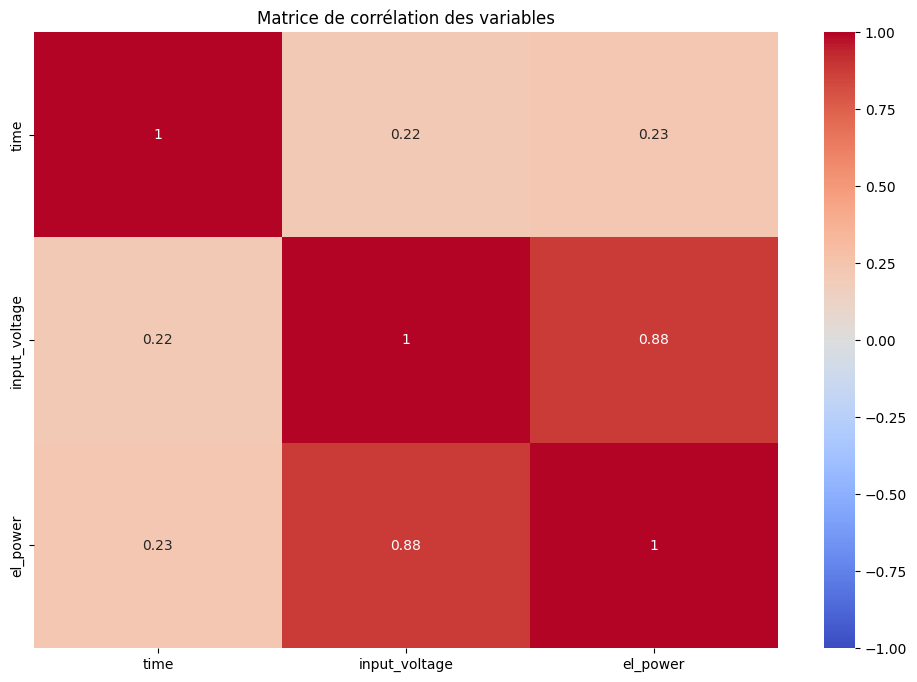

In [ ]:
# Matrice de corrélation
correlation_matrix = combined_dataset.corr()

# Heatmap des corrélations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation des variables')
plt.show()


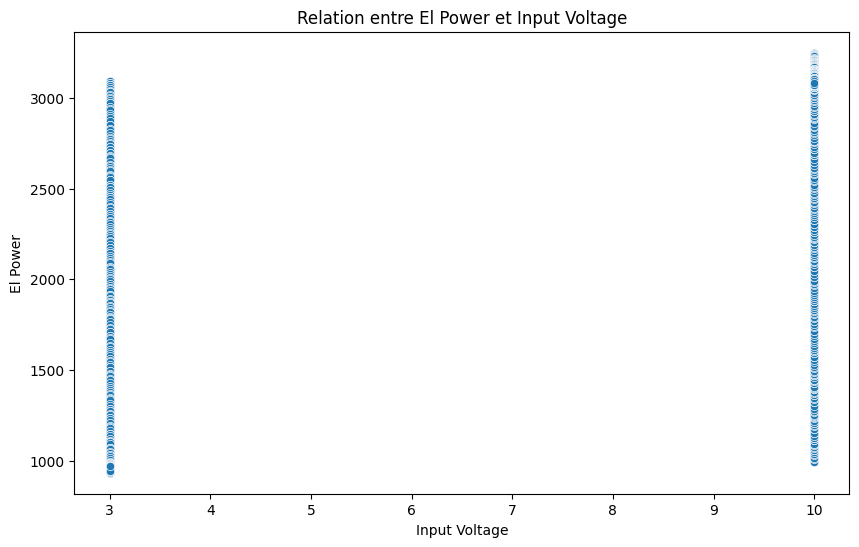

In [ ]:
# Scatter plot entre 'el_power' et 'input_voltage'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='input_voltage', y='el_power', data=combined_dataset)
plt.xlabel('Input Voltage')
plt.ylabel('El Power')
plt.title('Relation entre El Power et Input Voltage')
plt.show()


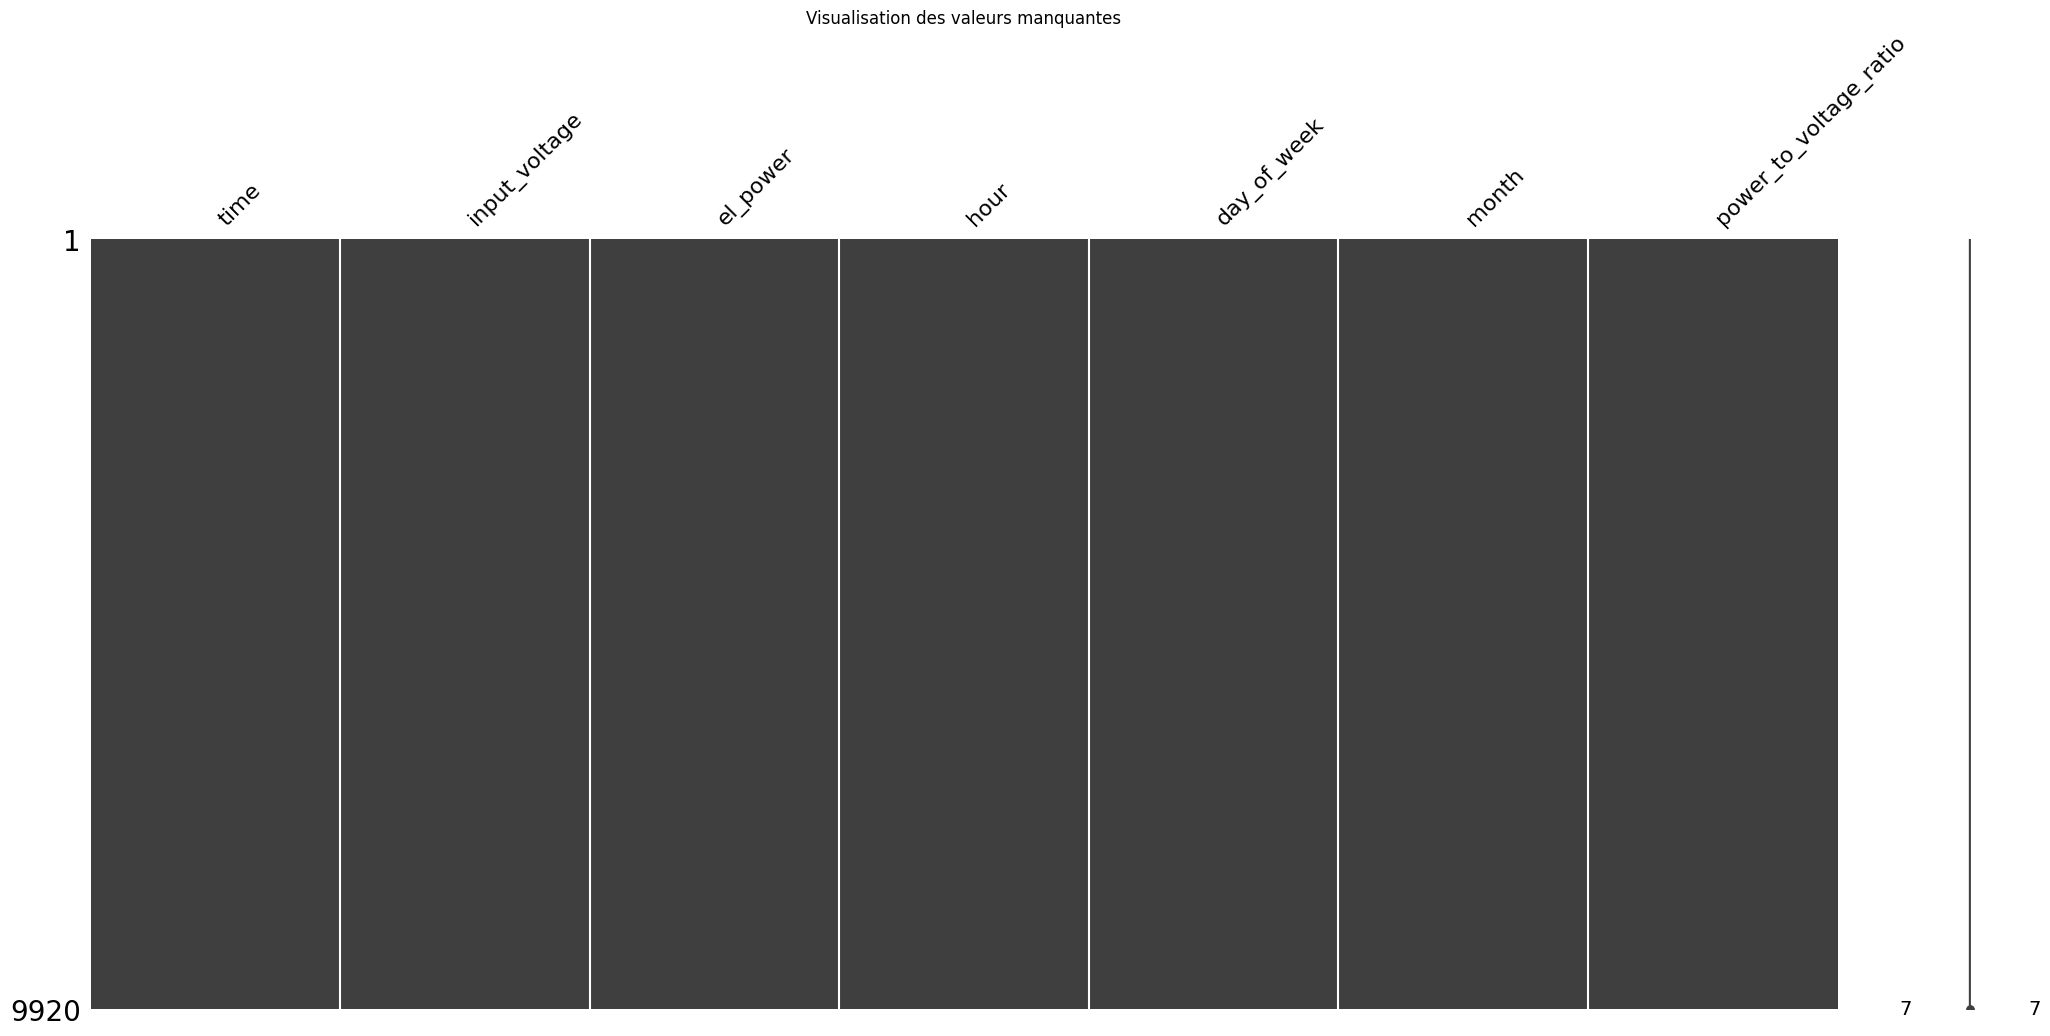

In [ ]:
import missingno as msno

# Visualisation des valeurs manquantes
msno.matrix(combined_dataset)
plt.title('Visualisation des valeurs manquantes')
plt.show()


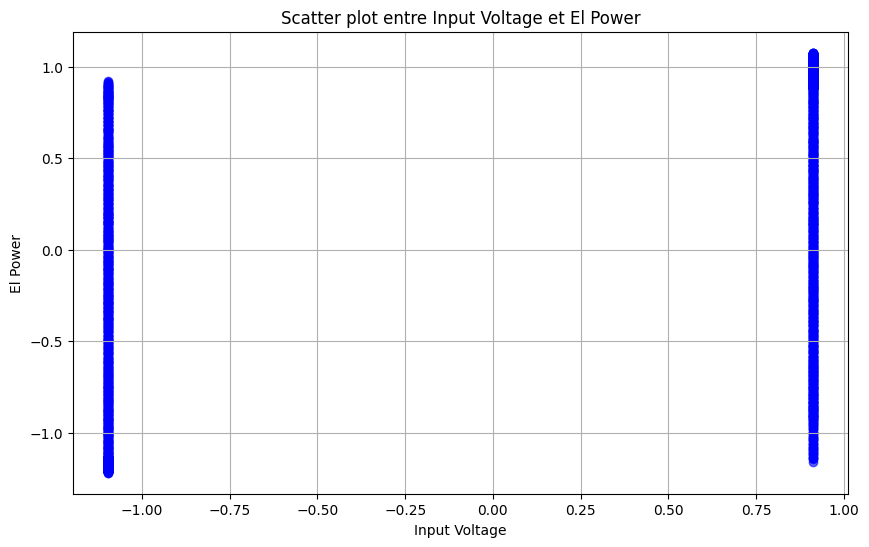

In [ ]:
# Scatter plot entre 'input_voltage' et 'el_power'
plt.figure(figsize=(10, 6))
plt.scatter(combined_dataset['input_voltage'], combined_dataset['el_power'], alpha=0.6, color='b')
plt.title('Scatter plot entre Input Voltage et El Power')
plt.xlabel('Input Voltage')
plt.ylabel('El Power')
plt.grid(True)
plt.show()

In [ ]:
fig = px.scatter(combined_dataset, x='input_voltage', y='el_power', title='Scatter plot entre Input Voltage et El Power')
fig.show()

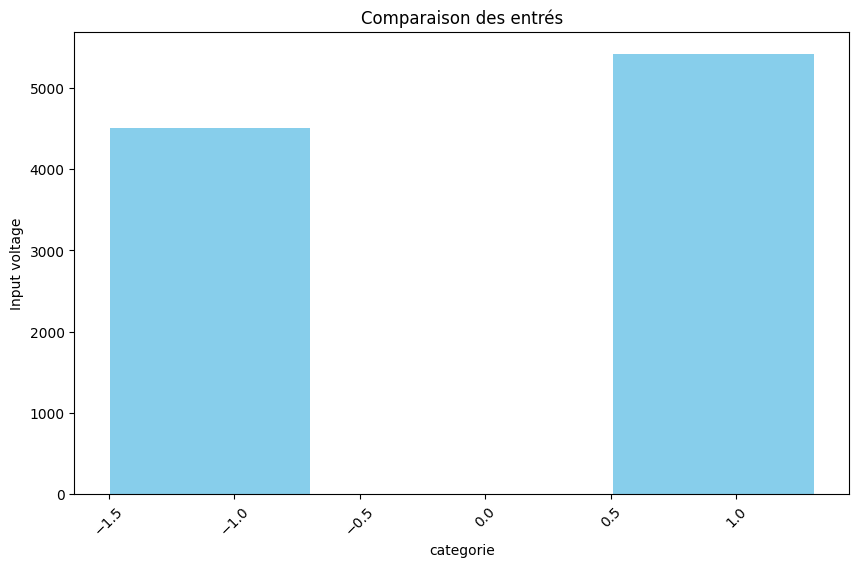

In [ ]:
# Graphique à barres pour une variable catégorielle 'category_column'
category_counts =combined_dataset['input_voltage'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.title('Comparaison des entrés')
plt.xlabel('categorie')
plt.ylabel('Input voltage')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Graphique à barres interactif avec Plotly
fig = px.bar(combined_dataset, x='input_voltage', title="Comparaison des puissances d'entré")
fig.show()


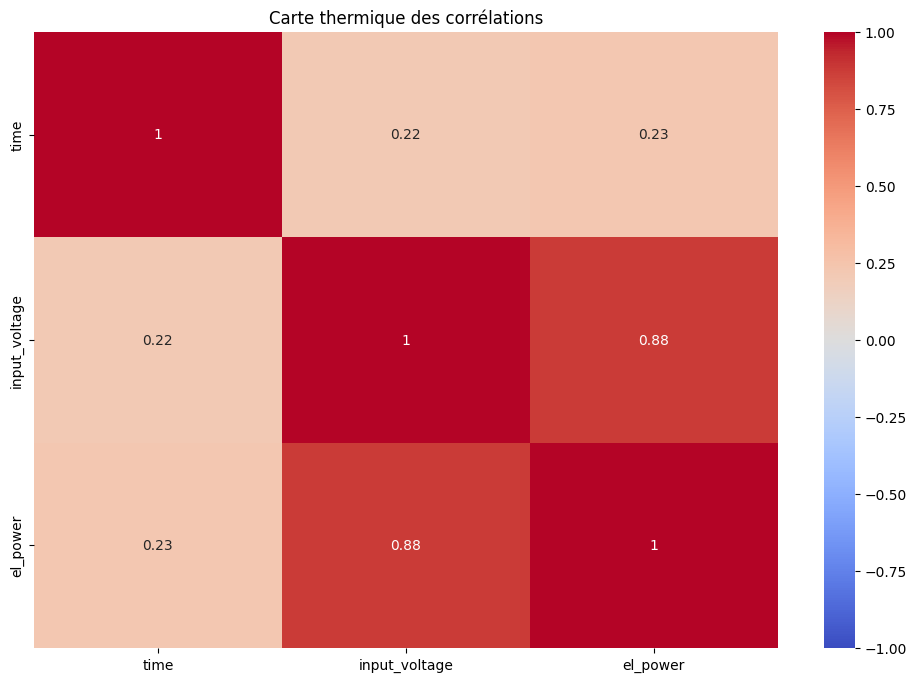

In [ ]:
# Calcul de la matrice de corrélation
correlation_matrix = combined_dataset.corr()

# Affichage de la carte thermique
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Carte thermique des corrélations')
plt.show()


In [ ]:
import plotly.figure_factory as ff

# Créer une heatmap interactive avec Plotly
correlation_matrix = combined_dataset.corr()
fig = ff.create_annotated_heatmap(z=correlation_matrix.values,
                                  x=list(correlation_matrix.columns),
                                  y=list(correlation_matrix.index),
                                  colorscale='Viridis')
fig.update_layout(title='Carte thermique des corrélations', autosize=False)
fig.show()


In [ ]:
fig = px.histogram(combined_dataset, x='el_power', title='Distribution de El Power')
fig.show()

In [ ]:
#4.2.1
combined_dataset.describe()

time  input_voltage      el_power    hour  \
count                           9920   9.920000e+03  9.920000e+03  9920.0   
mean   1970-01-01 00:00:00.000005764  -1.833659e-16  7.334635e-16     0.0   
min    1970-01-01 00:00:00.000000810  -1.096747e+00 -1.218057e+00     0.0   
25%    1970-01-01 00:00:00.000003286  -1.096747e+00 -1.161403e+00     0.0   
50%    1970-01-01 00:00:00.000005764   9.116952e-01  5.417961e-01     0.0   
75%    1970-01-01 00:00:00.000008242   9.116952e-01  9.450402e-01     0.0   
max    1970-01-01 00:00:00.000010720   9.116952e-01  1.077263e+00     0.0   
std                              NaN   1.000000e+00  1.000000e+00     0.0   

       day_of_week   month  power_to_voltage_ratio  
count       9920.0  9920.0             9920.000000  
mean           3.0     1.0                0.893194  
min            3.0     1.0               -1.271147  
25%            3.0     1.0                1.010258  
50%            3.0     1.0                1.048255  
75%            3.0     1.0                1.078811  
max            3.0     1.0                1.181604  
std            0.0     0.0                0.451484

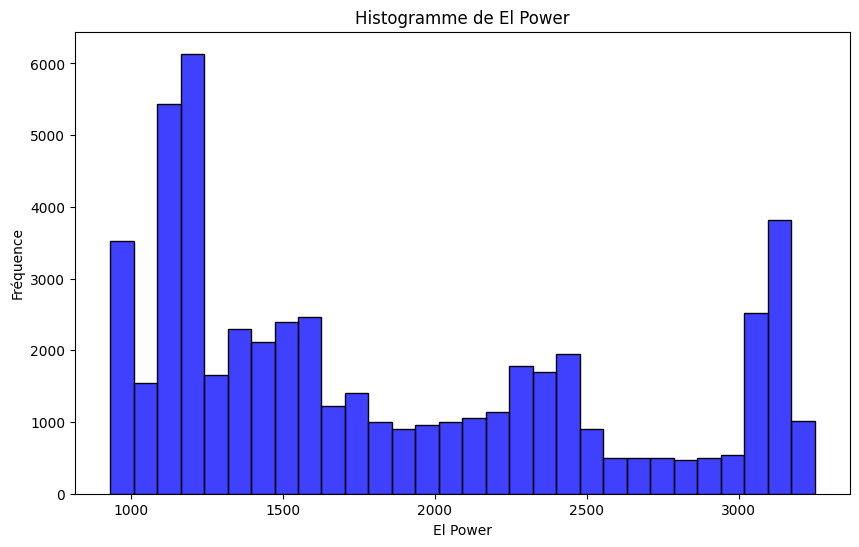

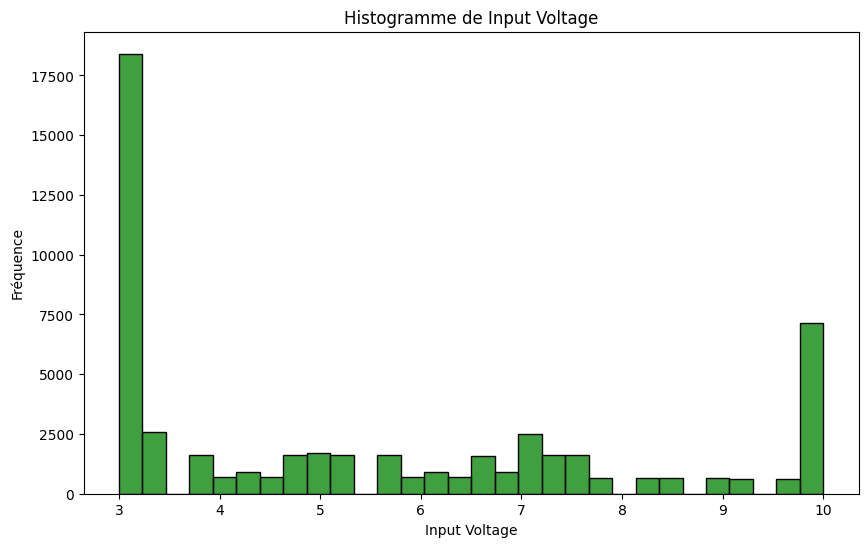

In [ ]:
#4.2.1
# Histogramme avec Seaborn pour 'el_power'
plt.figure(figsize=(10, 6))
sns.histplot(combined_dataset['el_power'], bins=30, kde=False, color='blue')
plt.title('Histogramme de El Power')
plt.xlabel('El Power')
plt.ylabel('Fréquence')
plt.show()

# Histogramme pour 'input_voltage'
plt.figure(figsize=(10, 6))
sns.histplot(combined_dataset['input_voltage'], bins=30, kde=False, color='green')
plt.title('Histogramme de Input Voltage')
plt.xlabel('Input Voltage')
plt.ylabel('Fréquence')
plt.show()

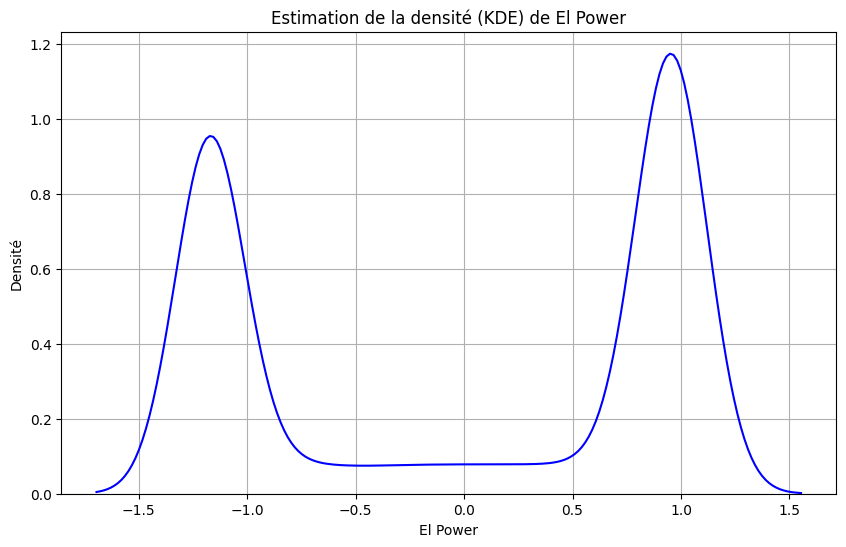

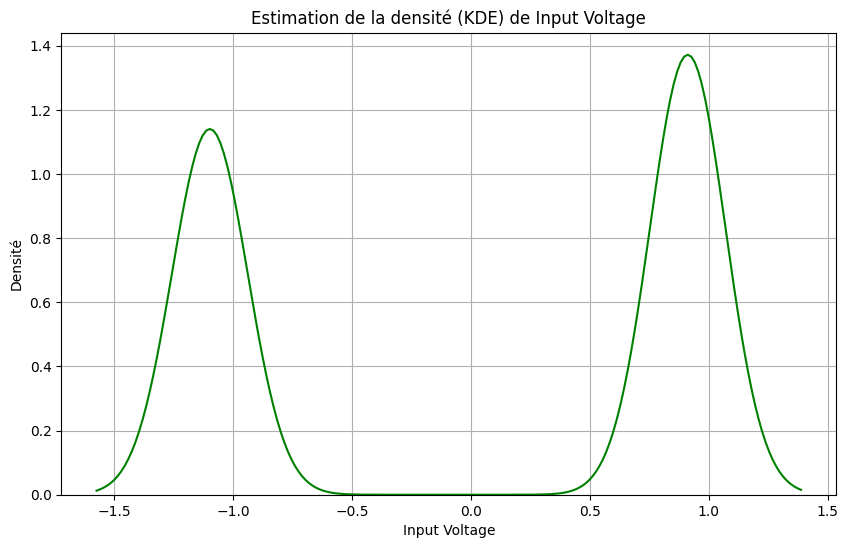

In [ ]:
#4.2.1
# KDE pour 'el_power'
plt.figure(figsize=(10, 6))
sns.kdeplot(combined_dataset['el_power'], color='blue')
plt.title('Estimation de la densité (KDE) de El Power')
plt.xlabel('El Power')
plt.ylabel('Densité')
plt.grid(True)
plt.show()

# KDE pour 'input_voltage'
plt.figure(figsize=(10, 6))
sns.kdeplot(combined_dataset['input_voltage'], color='green')
plt.title('Estimation de la densité (KDE) de Input Voltage')
plt.xlabel('Input Voltage')
plt.ylabel('Densité')
plt.grid(True)
plt.show()

In [ ]:

# Histogramme interactif avec KDE pour 'el_power'
fig = px.histogram(combined_dataset, x='el_power', nbins=30, marginal='violin', title='Histogramme interactif et KDE de El Power')
fig.show()

# Histogramme interactif avec KDE pour 'input_voltage'
fig = px.histogram(combined_dataset, x='input_voltage', nbins=30, marginal='violin', title='Histogramme interactif et KDE de Input Voltage')
fig.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



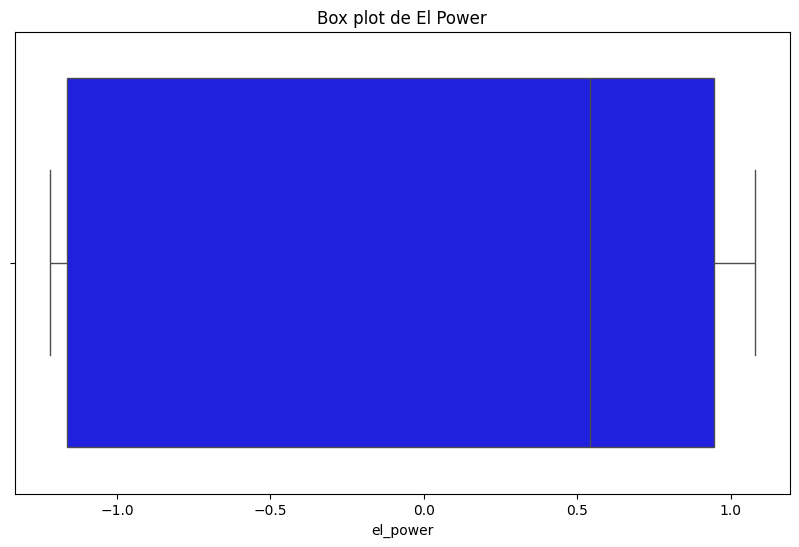

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



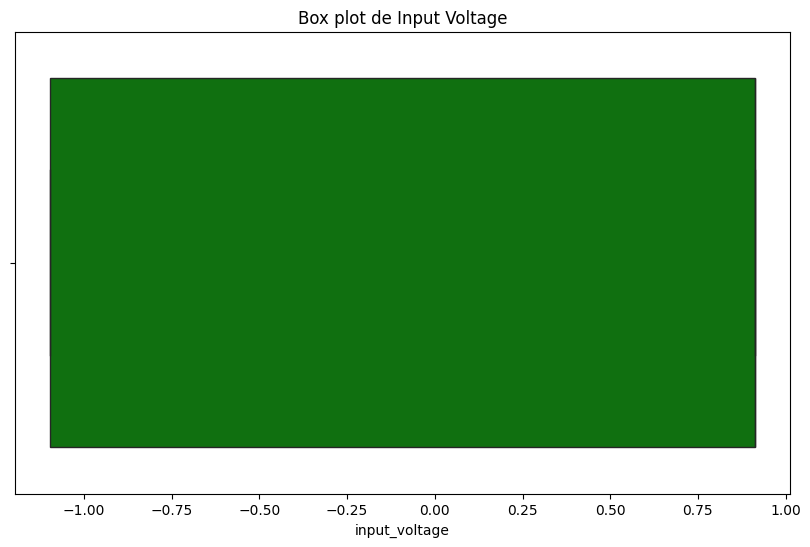

In [ ]:
# Box plot pour 'el_power'
plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_dataset['el_power'], color='blue')
plt.title('Box plot de El Power')
plt.show()

# Box plot pour 'input_voltage'
plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_dataset['input_voltage'], color='green')
plt.title('Box plot de Input Voltage')
plt.show()


In [ ]:
# Combiner les filtres pour 'el_power' et 'input_voltage'
combined_dataset_without_outliers = combined_dataset[(combined_dataset['el_power'] >= lower_bound_el) & (combined_dataset['el_power'] <= upper_bound_el) &
                         (combined_dataset['input_voltage'] >= lower_bound_volt) & (combined_dataset['input_voltage'] <= upper_bound_volt)]

# Afficher un aperçu des données sans valeurs aberrantes
print(combined_dataset_without_outliers.describe())


      time  input_voltage  el_power
count    0            0.0       0.0
mean   NaT            NaN       NaN
min    NaT            NaN       NaN
25%    NaT            NaN       NaN
50%    NaT            NaN       NaN
75%    NaT            NaN       NaN
max    NaT            NaN       NaN
std    NaN            NaN       NaN


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



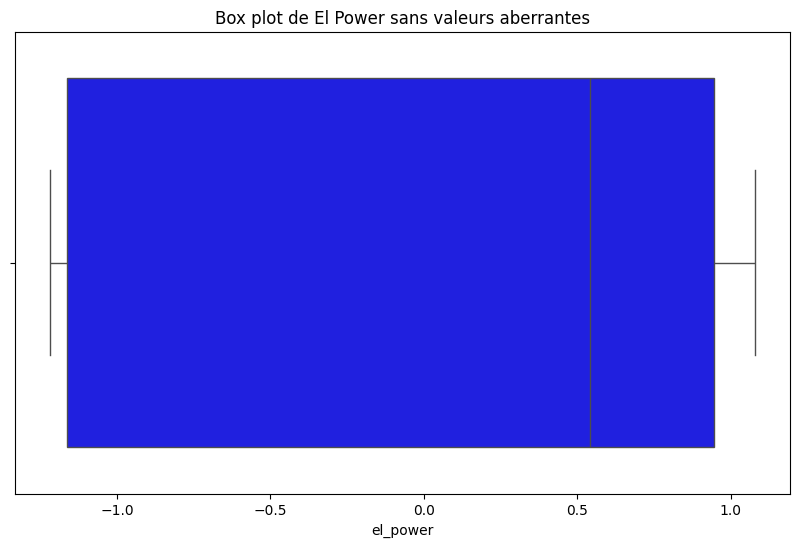

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



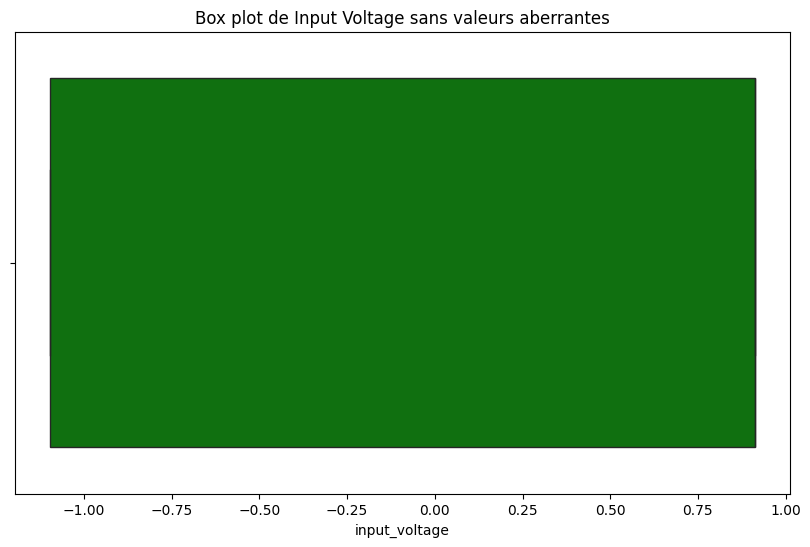

In [ ]:
# Box plot pour 'el_power' sans valeurs aberrantes
plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_dataset_without_outliers['el_power'], color='blue')
plt.title('Box plot de El Power sans valeurs aberrantes')
plt.show()

# Box plot pour 'input_voltage' sans valeurs aberrantes
plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_dataset_without_outliers['input_voltage'], color='green')
plt.title('Box plot de Input Voltage sans valeurs aberrantes')
plt.show()


In [ ]:
# Ajouter les colonnes (t-1) et (t-2) pour 'el_power'
combined_dataset['el_power_t-1'] = combined_dataset['el_power'].shift(1)  # Valeur de 'el_power' à t-1
combined_dataset['el_power_t-2'] = combined_dataset['el_power'].shift(2)  # Valeur de 'el_power' à t-2

# Supprimer les lignes avec des NaN résultant du décalage (au début du DataFrame)
combined_dataset = combined_dataset.dropna()

# Vérification des résultats
print(combined_dataset.head())

                           time  input_voltage  el_power  hour  day_of_week  \
2 1970-01-01 00:00:00.000000812       1.762729 -0.827456     0            3   
3 1970-01-01 00:00:00.000000813       1.762729 -0.849170     0            3   
4 1970-01-01 00:00:00.000000814       1.762729 -0.823091     0            3   
5 1970-01-01 00:00:00.000000815       1.762729 -0.802545     0            3   
6 1970-01-01 00:00:00.000000816       1.762729 -0.823146     0            3   

   month  power_to_voltage_ratio  el_power_t-1  el_power_t-2  
2      1               -0.469418     -0.857767     -0.849816  
3      1               -0.481736     -0.827456     -0.857767  
4      1               -0.466941     -0.849170     -0.827456  
5      1               -0.455286     -0.823091     -0.849170  
6      1               -0.466972     -0.802545     -0.823091  


In [ ]:
# Calcul de la variation de el_power entre t et t-1
combined_dataset['delta_el_power_t-1'] = combined_dataset['el_power'] - combined_dataset['el_power_t-1']

# Calcul de la variation de el_power entre t et t-2
combined_dataset['delta_el_power_t-2'] = combined_dataset['el_power'] - combined_dataset['el_power_t-2']
combined_dataset.describe()

time  input_voltage      el_power     hour  \
count                          52938   52938.000000  52938.000000  52938.0   
mean   1970-01-01 00:00:00.000005606      -0.000067      0.000032      0.0   
min    1970-01-01 00:00:00.000000810      -0.982670     -1.259087      0.0   
25%    1970-01-01 00:00:00.000003087      -0.982670     -0.881696      0.0   
50%    1970-01-01 00:00:00.000005431      -0.260196     -0.328427      0.0   
75%    1970-01-01 00:00:00.000007782       0.751266      0.769032      0.0   
max    1970-01-01 00:00:00.000012636       1.762729      1.945131      0.0   
std                              NaN       0.999960      1.000005      0.0   

       day_of_week    month  power_to_voltage_ratio  el_power_t-1  \
count      52938.0  52938.0            52938.000000  52938.000000   
mean           3.0      1.0                0.820220      0.000003   
min            3.0      1.0              -16.651686     -1.259087   
25%            3.0      1.0                0.866260     -0.881696   
50%            3.0      1.0                1.001313     -0.328521   
75%            3.0      1.0                1.171122      0.769032   
max            3.0      1.0                5.607954      1.945131   
std            0.0      0.0                1.433442      1.000008   

       el_power_t-2  delta_el_power_t-1  delta_el_power_t-2  
count  52938.000000        52938.000000        52938.000000  
mean      -0.000029            0.000029            0.000061  
min       -1.259087           -0.301703           -0.249329  
25%       -0.881696           -0.124149           -0.008339  
50%       -0.328619            0.000366            0.000201  
75%        0.769023            0.124204            0.008491  
max        1.945131            0.373830            0.406840  
std        1.000008            0.122482            0.016454

In [ ]:
fig = px.line(combined_dataset, x='time', y='el_power', title='Tendance de El Power au fil du temps')
fig.show()

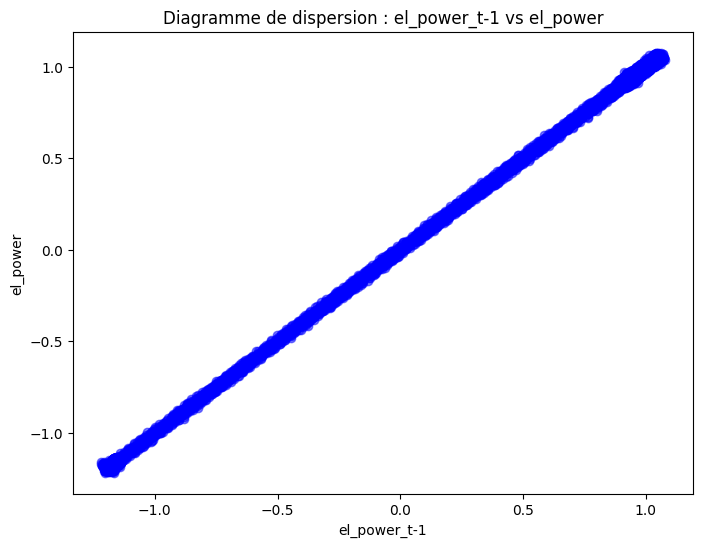

In [ ]:
# Diagramme de dispersion entre el_power_t-1 et el_power
plt.figure(figsize=(8, 6))
plt.scatter(combined_dataset['el_power_t-1'], combined_dataset['el_power'], alpha=0.5, color='b')

# Ajouter des étiquettes et un titre
plt.title('Diagramme de dispersion : el_power_t-1 vs el_power')
plt.xlabel('el_power_t-1')
plt.ylabel('el_power')

# Afficher le graphique
plt.show()

In [8]:
# Conversion des secondes en datetime
combined_dataset['time'] = pd.to_datetime(combined_dataset['time'], unit='s')

# Extrayons les différentes granularité temporelles
combined_dataset['year'] = combined_dataset['time'].dt.year
combined_dataset['month'] = combined_dataset['time'].dt.month
combined_dataset['week'] = combined_dataset['time'].dt.isocalendar().week
combined_dataset['day'] = combined_dataset['time'].dt.day
combined_dataset['hour'] = combined_dataset['time'].dt.hour
combined_dataset['minute'] = combined_dataset['time'].dt.minute
combined_dataset['second'] = combined_dataset['time'].dt.second

# # Ajout de la distinction weekend / semaine
# combined_dataset['is_weekend'] = combined_dataset['time'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

# Vérifiez le résultat
combined_dataset[['time', 'year', 'month', 'week', 'day', 'hour', 'minute', 'second']].head()

time  year  month  week  day  hour  minute  second
0 1970-01-01 00:13:30.070280  1970      1     1    1     0      13      30
1 1970-01-01 00:13:31.069380  1970      1     1    1     0      13      31
2 1970-01-01 00:13:32.068480  1970      1     1    1     0      13      32
3 1970-01-01 00:13:33.067580  1970      1     1    1     0      13      33
4 1970-01-01 00:13:34.066680  1970      1     1    1     0      13      34

In [9]:
# Conversion des secondes en datetime(données de Tests)
combined_dataset_test['time'] = pd.to_datetime(combined_dataset['time'], unit='s')

# Extrayons les différentes granularité temporelles
combined_dataset_test['year'] = combined_dataset_test['time'].dt.year
combined_dataset_test['month'] = combined_dataset_test['time'].dt.month
combined_dataset_test['week'] = combined_dataset_test['time'].dt.isocalendar().week
combined_dataset_test['day'] = combined_dataset_test['time'].dt.day
combined_dataset_test['hour'] = combined_dataset_test['time'].dt.hour
combined_dataset_test['minute'] = combined_dataset_test['time'].dt.minute
combined_dataset_test['second'] = combined_dataset_test['time'].dt.second

# # Ajout de la distinction weekend / semaine
# combined_dataset_test['is_weekend'] = combined_dataset_test['time'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

# Vérifiez le résultat
combined_dataset_test[['time', 'year', 'month', 'week', 'day', 'hour', 'minute', 'second']].head()

time  year  month  week  day  hour  minute  second
0 1970-01-01 00:13:30.070280  1970      1     1    1     0      13      30
1 1970-01-01 00:13:31.069380  1970      1     1    1     0      13      31
2 1970-01-01 00:13:32.068480  1970      1     1    1     0      13      32
3 1970-01-01 00:13:33.067580  1970      1     1    1     0      13      33
4 1970-01-01 00:13:34.066680  1970      1     1    1     0      13      34

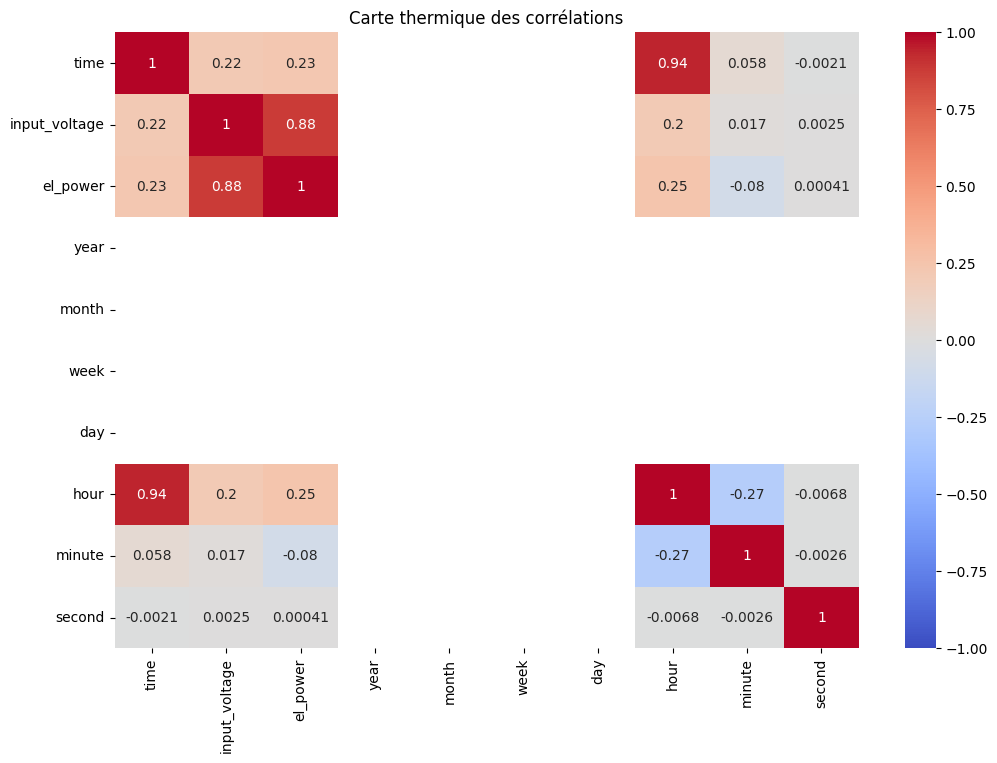

In [ ]:
# Calcul de la matrice de corrélation
correlation_matrix = combined_dataset.corr()

# Affichage de la carte thermique
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Carte thermique des corrélations')
plt.show()

In [ ]:
combined_dataset.nunique()

time             51706
input_voltage       34
el_power         52940
year                 1
month                1
week                 1
day                  1
hour                 4
minute              60
second              60
dtype: int64

In [ ]:
combined_dataset_test.nunique()

time              9920
input_voltage       29
el_power         18285
year                 1
month                1
week                 1
day                  1
hour                 3
minute              60
second              60
dtype: int64

In [ ]:
print(combined_dataset.columns)
print(combined_dataset.info())

Index(['time', 'input_voltage', 'el_power', 'year', 'month', 'week', 'day',
       'hour', 'minute', 'second', 'is_weekend'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           9920 non-null   datetime64[ns]
 1   input_voltage  9920 non-null   int64         
 2   el_power       9920 non-null   float64       
 3   year           9920 non-null   int32         
 4   month          9920 non-null   int32         
 5   week           9920 non-null   UInt32        
 6   day            9920 non-null   int32         
 7   hour           9920 non-null   int32         
 8   minute         9920 non-null   int32         
 9   second         9920 non-null   int32         
 10  is_weekend     9920 non-null   int64         
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(6), int64(2)
memory usage:

In [10]:

# (shifts) de 'el_power' pour prédictions à t+1
combined_dataset['el_power_t'] = combined_dataset['el_power']
combined_dataset['el_power_t+1'] = combined_dataset['el_power'].shift(-1)  # Décalage de -1 pour prédire t+1
combined_dataset['el_power_t+2'] = combined_dataset['el_power'].shift(-2)  # Décalage de -1 pour prédire t+2

# Retirer les lignes avec des valeurs NaN après le décalage
combined_dataset = combined_dataset.dropna()

# Visualisation de quelques lignes du dataset après transformation
print(combined_dataset.head())


                        time  input_voltage     el_power  year  month  week  \
0 1970-01-01 00:13:30.070280           10.0  1228.791720  1970      1     1   
1 1970-01-01 00:13:31.069380           10.0  1223.041745  1970      1     1   
2 1970-01-01 00:13:32.068480           10.0  1244.960866  1970      1     1   
3 1970-01-01 00:13:33.067580           10.0  1229.259058  1970      1     1   
4 1970-01-01 00:13:34.066680           10.0  1248.117024  1970      1     1   

   day  hour  minute  second   el_power_t  el_power_t+1  el_power_t+2  
0    1     0      13      30  1228.791720   1223.041745   1244.960866  
1    1     0      13      31  1223.041745   1244.960866   1229.259058  
2    1     0      13      32  1244.960866   1229.259058   1248.117024  
3    1     0      13      33  1229.259058   1248.117024   1262.974403  
4    1     0      13      34  1248.117024   1262.974403   1248.077560  


In [11]:
#version de test
# (shifts) de 'el_power' pour prédictions à t+1
combined_dataset_test['el_power_t'] = combined_dataset_test['el_power']
combined_dataset_test['el_power_t+1'] = combined_dataset_test['el_power'].shift(-1)  # Décalage de -1 pour prédire t+1
combined_dataset_test['el_power_t+2'] = combined_dataset_test['el_power'].shift(-2)  # Décalage de -1 pour prédire t+2

# Retirer les lignes avec des valeurs NaN après le décalage
combined_dataset_test = combined_dataset_test.dropna()

# Visualisation de quelques lignes du dataset après transformation
print(combined_dataset_test.head())


                        time  input_voltage     el_power  year  month  week  \
0 1970-01-01 00:13:30.070280            3.0  1193.140713  1970      1     1   
1 1970-01-01 00:13:31.069380            3.0  1107.066421  1970      1     1   
2 1970-01-01 00:13:32.068480            3.0  1180.406767  1970      1     1   
3 1970-01-01 00:13:33.067580            3.0  1095.551498  1970      1     1   
4 1970-01-01 00:13:34.066680            3.0  1177.073719  1970      1     1   

   day  hour  minute  second   el_power_t  el_power_t+1  el_power_t+2  
0    1     0      13      30  1193.140713   1107.066421   1180.406767  
1    1     0      13      31  1107.066421   1180.406767   1095.551498  
2    1     0      13      32  1180.406767   1095.551498   1177.073719  
3    1     0      13      33  1095.551498   1177.073719   1102.007801  
4    1     0      13      34  1177.073719   1102.007801   1173.835928  


In [ ]:
print(combined_dataset.columns)

Index(['time', 'input_voltage', 'el_power', 'year', 'month', 'week', 'day',
       'hour', 'minute', 'second', 'el_power_t', 'el_power_t+1',
       'el_power_t-1', 'el_power_t-2', 'el_power_ma', 'hour_sin', 'hour_cos',
       'is_weekend'],
      dtype='object')


Voici un récapitulatif des étapes que nous avons suivies jusqu'à présent pour le projet de prédiction de la puissance électrique (el_power) :

1. Préparation et exploration des données :
Profilage des données : Nous avons commencé par analyser et visualiser les données pour mieux comprendre leur structure et identifier des éléments comme les valeurs aberrantes. Des statistiques sommaires ont été calculées, et plusieurs graphiques (scatter plots, bar charts, heatmaps, etc.) ont été créés pour visualiser les relations entre les variables et identifier des problèmes de qualité des données.
Valeurs aberrantes : Nous avons utilisé des techniques comme les box plots et les règles des 3 sigmas pour détecter les valeurs aberrantes dans les données. Ces valeurs ont été visualisées et traitées en conséquence (suppression ou ajustement selon leur nature).
2. Ajout de colonnes décalées (shifts) :
Pour les prédictions, nous avons ajouté des colonnes décalées à notre dataset. Ces colonnes représentent les valeurs de la puissance électrique (el_power) à des instants précédents (t-1, t-2, etc.).
Cette étape est essentielle car elle permet de capturer la variation dans le temps, un aspect crucial pour la prédiction de séries temporelles.
3. Décomposition temporelle :
Nous avons décomposé la colonne timestamp (l'horodatage) pour extraire différentes granularités temporelles, telles que le mois, la semaine, le jour, l'heure, la minute et la seconde. Cela permet de capturer les patterns temporels qui peuvent influencer la production d’électricité.
Des colonnes comme month, week, day, hour, minute, et second ont été ajoutées au dataset pour permettre l'utilisation de ces informations temporelles dans nos modèles de prédiction.
4. Préparation des données pour les prédictions :
Nous avons ensuite ajouté une colonne el_power_t+1, représentant la puissance électrique à l’instant suivant (t+1), en utilisant la méthode de décalage (shift) sur la colonne el_power.
Cette colonne est utilisée comme la variable cible (ou dépendante) pour la prédiction.
5. Modélisation et régression linéaire :
Nous avons utilisé un modèle de régression linéaire pour prédire la puissance électrique à l’instant t+1 en fonction des caractéristiques temporelles (mois, jour, heure, minute, etc.) et des valeurs précédentes de el_power.
Le dataset a été divisé en deux parties : un jeu d'entraînement et un jeu de test, pour évaluer la performance du modèle.
Nous avons ensuite fait des prédictions pour les valeurs futures de el_power.
6. Visualisation des résultats :
Enfin, nous avons utilisé des scatter plots pour comparer les prédictions du modèle avec les valeurs réelles de la production électrique. Cela permet de voir visuellement si les prévisions sont proches des valeurs observées et si le modèle capture bien les variations temporelles.
Prochaines étapes :
Amélioration du modèle : Si nécessaire, nous pourrions essayer des modèles plus complexes, comme les forêts aléatoires (Random Forest), les réseaux neuronaux ou les méthodes dédiées aux séries temporelles (ARIMA, Prophet).
Validation et optimisation : Nous pourrions aussi explorer la validation croisée, l’optimisation des hyperparamètres et la prise en compte de la saisonnalité pour améliorer les performances des prédictions.
En résumé, nous avons mis en place une approche de séries temporelles en enrichissant les données avec des décalages temporels et en extrayant des informations temporelles (granularités). Nous avons ensuite utilisé une régression linéaire pour faire des prédictions à court terme (t+1) et visualisé les résultats pour évaluer les performances.

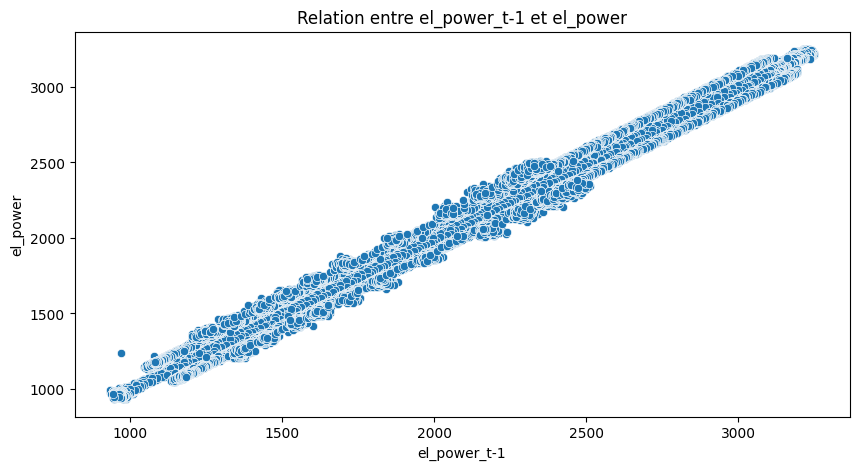

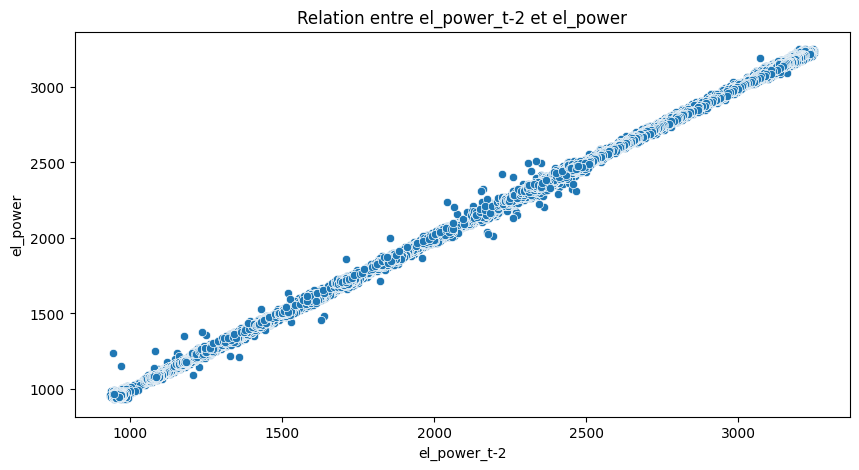

In [ ]:
# Variables indépendantes : el_power_t-1, el_power_t-2
# Variable dépendante : el_power

# Graphique de dispersion : el_power_t-1 vs el_power
plt.figure(figsize=(10, 5))
sns.scatterplot(x='el_power_t-1', y='el_power', data=combined_dataset)
plt.title('Relation entre el_power_t-1 et el_power')
plt.show()

# Graphique de dispersion : el_power_t-2 vs el_power
plt.figure(figsize=(10, 5))
sns.scatterplot(x='el_power_t-2', y='el_power', data=combined_dataset)
plt.title('Relation entre el_power_t-2 et el_power')
plt.show()


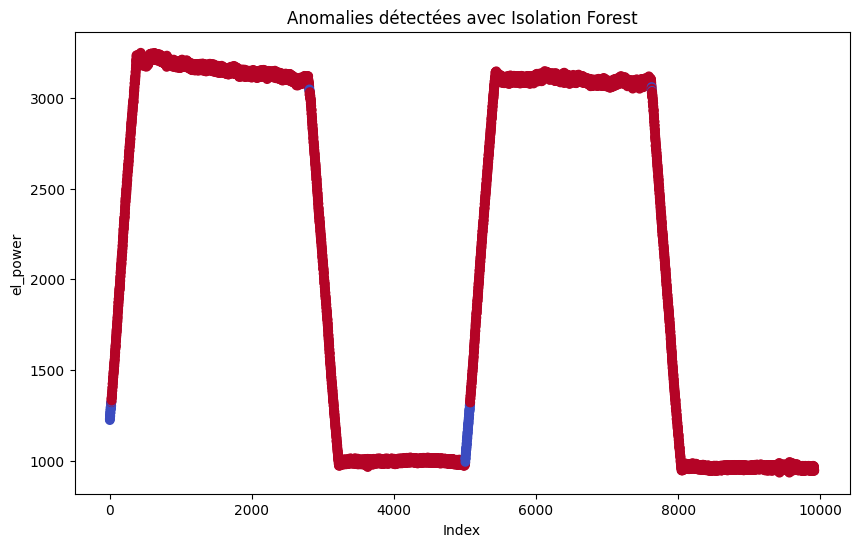

Nombre d'anomalies détectées par l'Isolation Forest: 98


In [ ]:
#4.2.4 Isolation Forest model
iso_forest = IsolationForest(contamination=0.01)  # Contamination = proportion d'anomalies attendues
combined_dataset['anomaly'] = iso_forest.fit_predict(combined_dataset[['el_power', 'input_voltage']])

# Visualisation des anomalies détectées
plt.figure(figsize=(10, 6))
plt.scatter(combined_dataset.index, combined_dataset['el_power'], c=combined_dataset['anomaly'], cmap='coolwarm')
plt.title('Anomalies détectées avec Isolation Forest')
plt.xlabel('Index')
plt.ylabel('el_power')
plt.show()

# Affichage du nombre d'anomalies détectées
print(f"Nombre d'anomalies détectées par l'Isolation Forest: {(combined_dataset['anomaly'] == -1).sum()}")


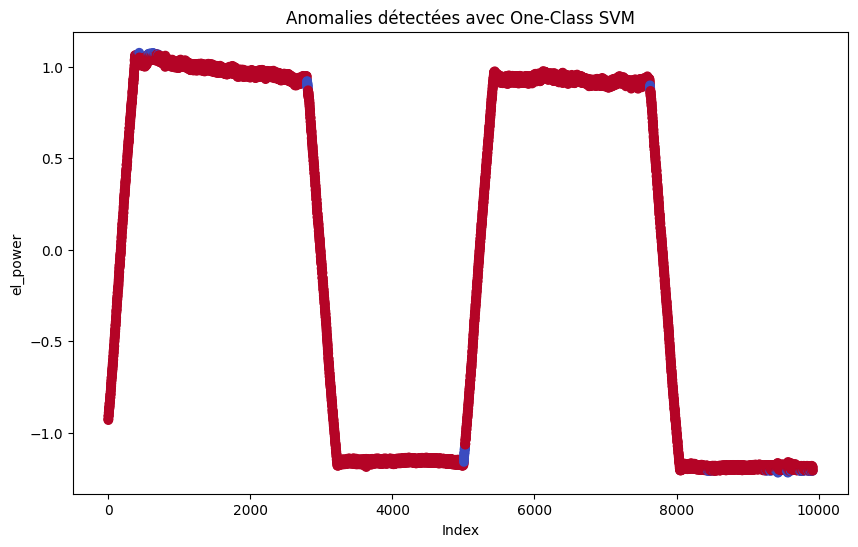

Nombre d'anomalies détectées par le One-Class SVM: 99


In [ ]:
#4.2.4 One-Class SVM
svm = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)  # nu = proportion d'anomalies attendues
combined_dataset['anomaly_svm'] = svm.fit_predict(combined_dataset[['el_power', 'input_voltage']])

# Visualisation des anomalies détectées
plt.figure(figsize=(10, 6))
plt.scatter(combined_dataset.index, combined_dataset['el_power'], c=combined_dataset['anomaly_svm'], cmap='coolwarm')
plt.title('Anomalies détectées avec One-Class SVM')
plt.xlabel('Index')
plt.ylabel('el_power')
plt.show()

# Affichage du nombre d'anomalies détectées
print(f"Nombre d'anomalies détectées par le One-Class SVM: {(combined_dataset['anomaly_svm'] == -1).sum()}")


In [ ]:
#4.3
#4.3.1 Groupement par mois (supposons que vous ayez une colonne 'month')
grouped_by_month = combined_dataset.groupby('month')

# Calcul des statistiques sommaires pour chaque mois
monthly_summary = grouped_by_month['el_power'].agg(['sum', 'mean', 'count'])

# Affichage du tableau de synthèse mensuel
print(monthly_summary)

                sum         mean  count
month                                  
1      5.967805e+07  1859.534743  32093


In [ ]:
#4.3.1 Groupement par semaine
grouped_by_week = combined_dataset.groupby('week')

# Agrégation des statistiques pour chaque semaine
weekly_summary = grouped_by_week['el_power'].agg(['sum', 'mean', 'count'])

# Affichage du tableau de synthèse hebdomadaire
print(weekly_summary)


               sum         mean  count
week                                  
1     5.967805e+07  1859.534743  32093


In [ ]:
#4.3.1 Groupement par jour
grouped_by_day = combined_dataset.groupby('day')

# Agrégation des statistiques pour plusieurs colonnes
daily_summary = grouped_by_day.agg({
    'el_power': ['sum', 'mean', 'count'],
    'input_voltage': ['mean', 'min', 'max']
})

# Affichage du tableau de synthèse journalier
print(daily_summary)


         el_power                     input_voltage           
              sum         mean  count          mean  min   max
day                                                           
1    5.967805e+07  1859.534743  32093      5.498736  3.0  10.0


In [ ]:
#4.3.1 Groupement par heure
grouped_by_hour = combined_dataset.groupby('hour')

# Calcul de la moyenne et du maximum par heure
hourly_summary = grouped_by_hour.agg({
    'el_power': ['mean', 'max'],
    'input_voltage': ['mean', 'min', 'max']
})

print(hourly_summary)

         el_power              input_voltage           
             mean          max          mean  min   max
hour                                                   
0     1734.341975  3249.891217      5.258666  3.0  10.0
1     1916.456757  3191.966802      5.857850  3.0  10.0
2     1947.184210  3193.846351      5.259238  3.0  10.0
3     1127.108059  1186.083110      3.000000  3.0   3.0


In [ ]:
#4.3.1 Bar plot des moyennes mensuelles
monthly_summary['mean'].plot(kind='bar')
plt.title('Moyenne de la production par mois')
plt.ylabel('Moyenne de el_power')
plt.show()

In [ ]:
#4.3.2 Filtrer les enregistrements où el_power > 1
high_power = combined_dataset[combined_dataset['el_power'] > 1]

# Afficher les premières lignes du résultat filtré
print(high_power.head())
# Filtrer les enregistrements avec deux conditions
filtered_data = combined_dataset[(combined_dataset['el_power'] > 1) & (combined_dataset['input_voltage'] < 0.5)]

# Afficher les premières lignes du résultat filtré
print(filtered_data.head())

# Trier par el_power (ordre croissant)
sorted_data = combined_dataset.sort_values(by='el_power')

# Afficher les premières lignes du résultat trié
print(sorted_data.head())


# Trier par el_power (ordre décroissant)
sorted_data_desc = combined_dataset.sort_values(by='el_power', ascending=False)

# Afficher les premières lignes du résultat trié en ordre décroissant
print(sorted_data_desc.head())

# Filtrer les valeurs considérées comme anomalies (label = -1 par exemple)
anomalies = combined_dataset[combined_dataset['anomaly'] == -1]

# Afficher les anomalies détectées
print(anomalies.head())

# Tri par el_power et input_voltage
sorted_data_multi = combined_dataset.sort_values(by=['el_power', 'input_voltage'])

# Afficher les premières lignes du résultat
print(sorted_data_multi.head())

combined_dataset['time'] = pd.to_datetime(combined_dataset['time'])

# Grouper par jour et sommer la production d'électricité
daily_production = combined_dataset.groupby(combined_dataset['time'].dt.date)['el_power'].sum()

# Trier par production journalière décroissante pour trouver les jours avec la plus forte production
top_days = daily_production.sort_values(ascending=False)

# Afficher les 5 jours avec la production la plus élevée
print(top_days.head())

# Grouper les données par heure et calculer l'écart-type de la production
hourly_fluctuations = combined_dataset.groupby(combined_dataset['time'].dt.hour)['el_power'].std()

# Trier par fluctuation (écart-type) décroissante pour trouver les heures avec la plus grande fluctuation
top_fluctuations = hourly_fluctuations.sort_values(ascending=False)

# Afficher les heures avec la plus grande fluctuation
print(top_fluctuations.head())

# Filtrer les anomalies détectées (label = -1)
anomalies = combined_dataset[combined_dataset['anomaly'] == -1]

# Afficher les anomalies détectées
print(anomalies.head())

# Optionnel : Calculer des statistiques sommaires sur les anomalies
anomalies_summary = anomalies.describe()
print(anomalies_summary)

# Grouper les anomalies par jour pour visualiser la répartition dans le temps
anomalies_per_day = anomalies.groupby(anomalies['time'].dt.date).size()

# Tracer les anomalies détectées par jour
plt.figure(figsize=(10,6))
anomalies_per_day.plot(kind='bar')
plt.title('Nombre d\'anomalies détectées par jour')
plt.xlabel('Date')
plt.ylabel('Nombre d\'anomalies')
plt.show()

# Grouper les anomalies par jour pour visualiser la répartition dans le temps
anomalies_per_day = anomalies.groupby(anomalies['time'].dt.date).size()

# Tracer les anomalies détectées par jour
plt.figure(figsize=(10,6))
anomalies_per_day.plot(kind='bar')
plt.title('Nombre d\'anomalies détectées par jour')
plt.xlabel('Date')
plt.ylabel('Nombre d\'anomalies')
plt.show()


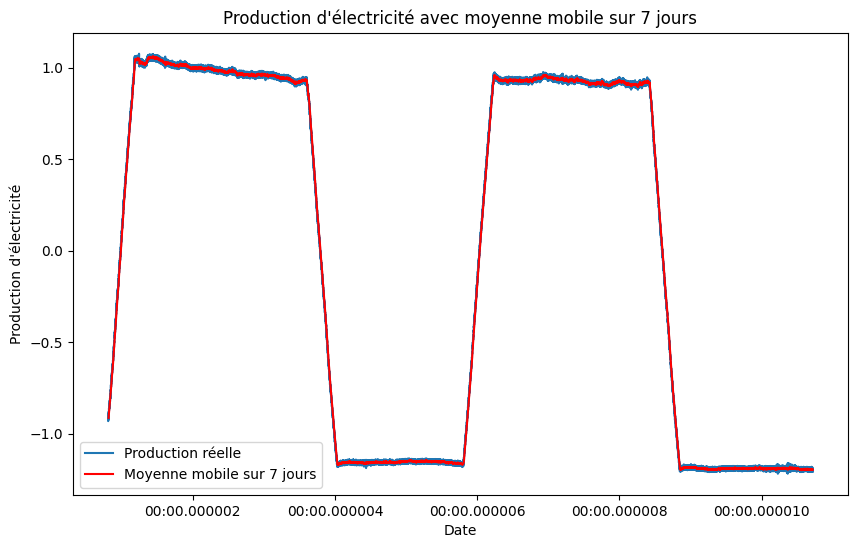

In [ ]:
#4.3.3 Assurez-vous que la colonne 'date' est bien au format datetime
combined_dataset['time'] = pd.to_datetime(combined_dataset['time'])

# Appliquer une moyenne mobile sur une fenêtre de 7 jours (ajustable selon la fréquence des données)
combined_dataset['el_power_rolling'] = combined_dataset['el_power'].rolling(window=7).mean()

# Tracer la production d'électricité avec la moyenne mobile
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(combined_dataset['time'], combined_dataset['el_power'], label='Production réelle')
plt.plot(combined_dataset['time'], combined_dataset['el_power_rolling'], label='Moyenne mobile sur 7 jours', color='red')
plt.title('Production d\'électricité avec moyenne mobile sur 7 jours')
plt.xlabel('Date')
plt.ylabel('Production d\'électricité')
plt.legend()
plt.show()

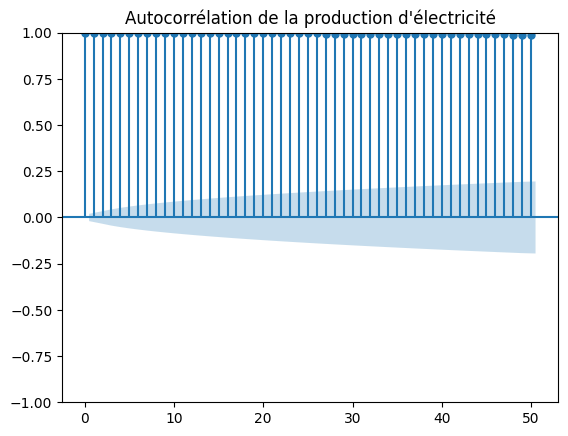

In [ ]:
# Tracer la fonction d'autocorrélation
plot_acf(combined_dataset['el_power'].dropna(), lags=50)
plt.title('Autocorrélation de la production d\'électricité')
plt.show()

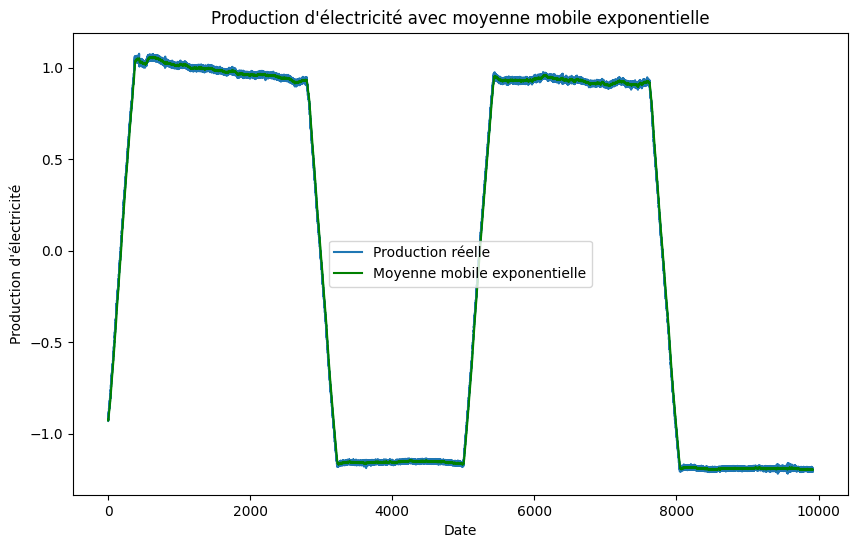

In [ ]:
# Appliquer une moyenne mobile exponentielle avec un facteur d'atténuation (span=12 peut être ajusté)
combined_dataset['el_power_ewm'] = combined_dataset['el_power'].ewm(span=12).mean()

# Tracer la production d'électricité avec la moyenne mobile exponentielle
plt.figure(figsize=(10,6))
plt.plot(combined_dataset.index, combined_dataset['el_power'], label='Production réelle')
plt.plot(combined_dataset.index, combined_dataset['el_power_ewm'], label='Moyenne mobile exponentielle', color='green')
plt.title('Production d\'électricité avec moyenne mobile exponentielle')
plt.xlabel('Date')
plt.ylabel('Production d\'électricité')
plt.legend()
plt.show()

In [ ]:
#4.4

#4.4.3
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Pour l'exemple, on sélectionne le même sous-ensemble de données d'entraînement utilisé précédemment
# Normalisez les données pour un résultat optimal
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Appliquer PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Appliquer t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300)
X_tsne = tsne.fit_transform(X_train_scaled)

# Visualisation des résultats avec PCA
plt.figure(figsize=(12, 6))

# PCA
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='viridis')
plt.title('Visualisation PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_train, palette='viridis')
plt.title('Visualisation t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.tight_layout()
plt.show()


<ipython-input-12-af961a677f33>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_dataset.fillna(method='bfill', inplace=True)
<ipython-input-12-af961a677f33>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_dataset_test.fillna(method='bfill', inplace=True)
<ipython-input-12-af961a677f33>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_dataset['el_power_ma'] = combined_dataset['el_power'].rolling(window=2).mean().fillna(method='bfill')
<ipython-input-12-af961a677f33>:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_dataset_test['el_power_ma'] = combined_dataset_test['el_power'].rolling(window=

                        time  input_voltage     el_power  year  month  week  \
0 1970-01-01 00:13:30.070280           10.0  1228.791720  1970      1     1   
1 1970-01-01 00:13:31.069380           10.0  1223.041745  1970      1     1   
2 1970-01-01 00:13:32.068480           10.0  1244.960866  1970      1     1   
3 1970-01-01 00:13:33.067580           10.0  1229.259058  1970      1     1   
4 1970-01-01 00:13:34.066680           10.0  1248.117024  1970      1     1   

   day  hour  minute  second   el_power_t  el_power_t+1  el_power_t+2  \
0    1     0      13      30  1228.791720   1223.041745   1244.960866   
1    1     0      13      31  1223.041745   1244.960866   1229.259058   
2    1     0      13      32  1244.960866   1229.259058   1248.117024   
3    1     0      13      33  1229.259058   1248.117024   1262.974403   
4    1     0      13      34  1248.117024   1262.974403   1248.077560   

   el_power_t-1  el_power_t-2  el_power_ma  hour_sin  hour_cos  
0   1228.791720   122

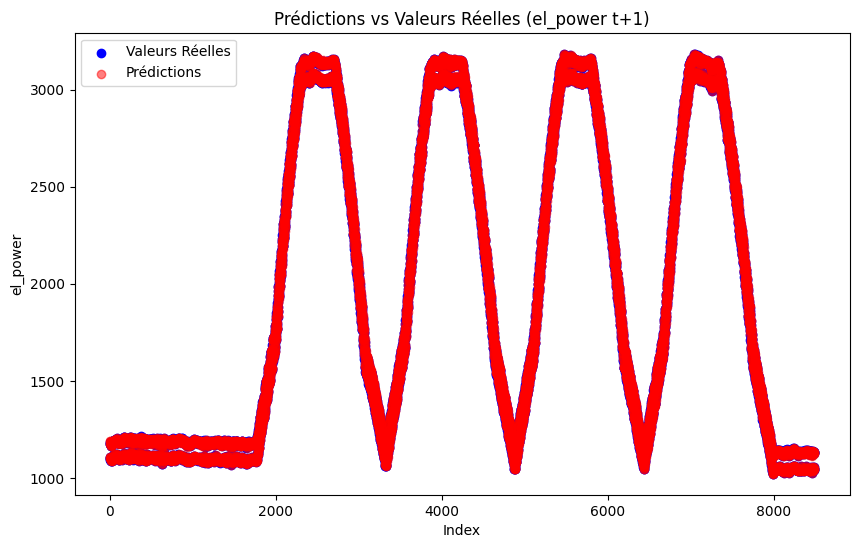

In [12]:

# 1. Ajouter les dérivées de puissance
combined_dataset['el_power_t-1'] = combined_dataset['el_power'].shift(1)
combined_dataset['el_power_t-2'] = combined_dataset['el_power'].shift(2)
combined_dataset_test['el_power_t-1'] = combined_dataset_test['el_power'].shift(1)
combined_dataset_test['el_power_t-2'] = combined_dataset_test['el_power'].shift(2)

# Remplacer les NaN causés par shift avec des valeurs de début de série
combined_dataset.fillna(method='bfill', inplace=True)
combined_dataset_test.fillna(method='bfill', inplace=True)

# 2. Ajouter une moyenne mobile (sur 3 valeurs ici)
combined_dataset['el_power_ma'] = combined_dataset['el_power'].rolling(window=2).mean().fillna(method='bfill')
combined_dataset_test['el_power_ma'] = combined_dataset_test['el_power'].rolling(window=2).mean().fillna(method='bfill')

# 3. Ajouter des colonnes sin et cos pour l'heure (représentation périodique)
combined_dataset['hour_sin'] = np.sin(2 * np.pi * combined_dataset['hour'] / 24)
combined_dataset['hour_cos'] = np.cos(2 * np.pi * combined_dataset['hour'] / 24)
combined_dataset_test['hour_sin'] = np.sin(2 * np.pi * combined_dataset_test['hour'] / 24)
combined_dataset_test['hour_cos'] = np.cos(2 * np.pi * combined_dataset_test['hour'] / 24)


print(combined_dataset.head())
# Sélection des caractéristiques


X_train = combined_dataset[['input_voltage', 'hour','minute','second', 'el_power_t-1', 'el_power_t-2']]
y_train = combined_dataset['el_power_t+1']

X_test = combined_dataset_test[['input_voltage', 'hour','minute', 'second','el_power_t-1', 'el_power_t-2']]
y_test = combined_dataset_test['el_power_t+1']
# Normalisation
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}

for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Modèle et évaluation
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Affichage des résultats
    print(f"Résultats de la régression linéaire avec {scaler_name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²: {r2:.4f}\n")

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_df.head())



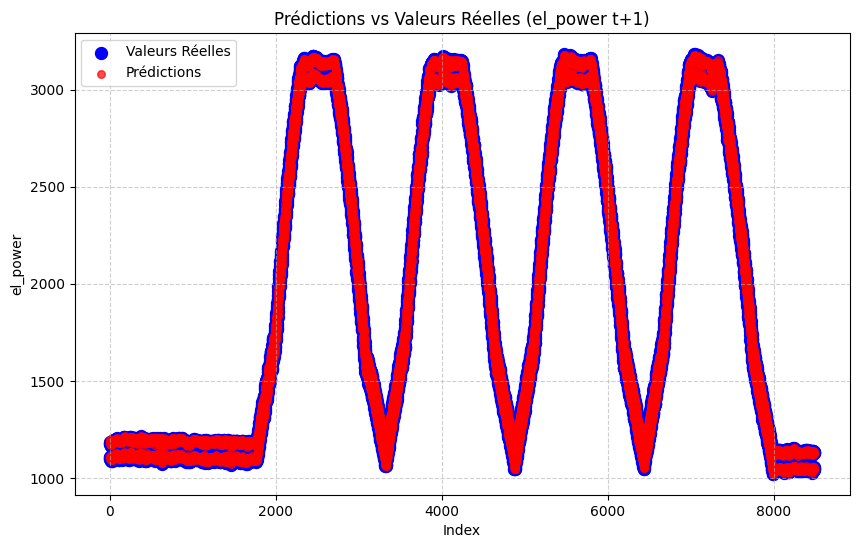

In [25]:

plt.figure(figsize=(10, 6))

# Augmenter la taille et l'opacité des valeurs réelles
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valeurs Réelles', s=50, alpha=1.0,linewidth=2.5)

# Réduire l'opacité des prédictions pour qu'elles ne masquent pas les valeurs réelles
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Prédictions', s=30, alpha=0.7)

plt.title('Prédictions vs Valeurs Réelles (el_power t+1)')
plt.xlabel('Index')
plt.ylabel('el_power')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)  # Ajouter une grille pour faciliter la lecture
plt.show()


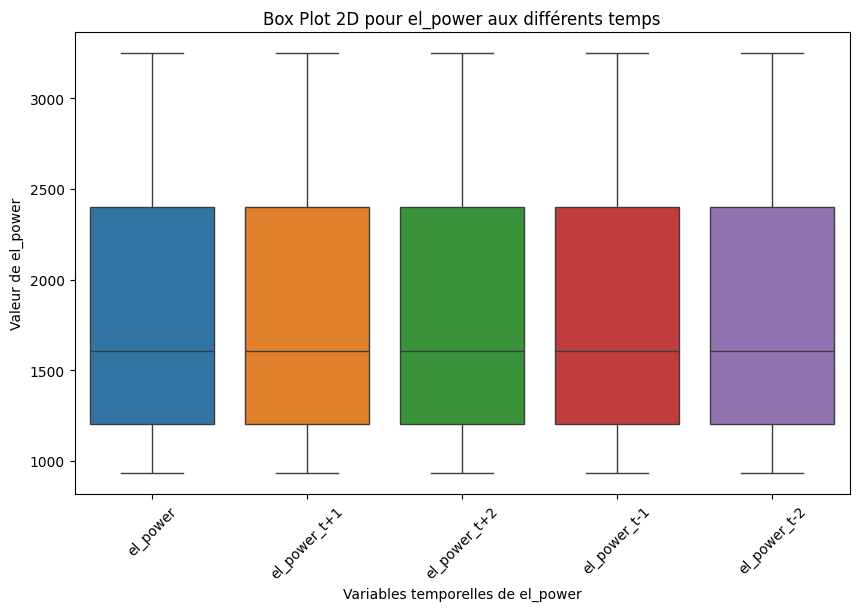

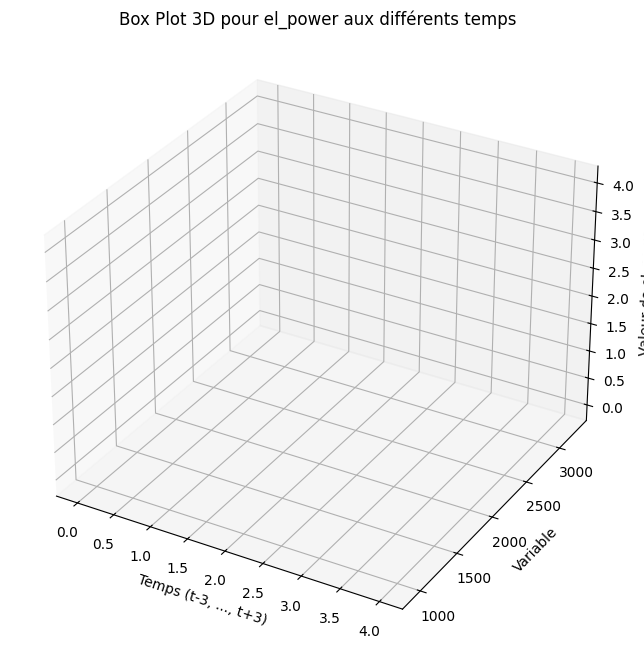

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

# Création de sous-ensembles pour les différentes colonnes temporelles
df_power = combined_dataset[['el_power', 'el_power_t+1', 'el_power_t+2',
                             'el_power_t-1', 'el_power_t-2']]

# Box Plot 2D
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_power)
plt.title("Box Plot 2D pour el_power aux différents temps")
plt.xlabel("Variables temporelles de el_power")
plt.ylabel("Valeur de el_power")
plt.xticks(rotation=45)
plt.show()

# Box Plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Coordonnées des différentes variables
x = np.arange(len(df_power.columns))
for i, col in enumerate(df_power.columns):
    y = np.full(df_power[col].shape, x[i])
    z = df_power[col]
    ax.scatter(y, z, zs=x[i], zdir='y', label=col)

ax.set_xlabel("Temps (t-3, ..., t+3)")
ax.set_ylabel("Variable")
ax.set_zlabel("Valeur de el_power")
plt.title("Box Plot 3D pour el_power aux différents temps")
plt.show()


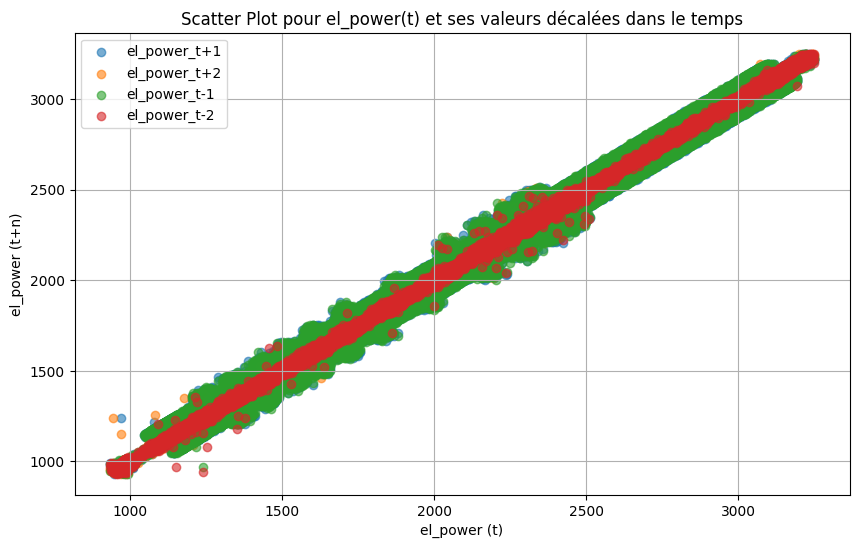

In [ ]:
# Scatter Plot pour el_power(t) et el_power(t+n)
plt.figure(figsize=(10, 6))
for col in df_power.columns[1:]:  # On ignore 'el_power' (t) car il est utilisé comme référence
    plt.scatter(df_power['el_power'], df_power[col], label=col, alpha=0.6)

plt.title("Scatter Plot pour el_power(t) et ses valeurs décalées dans le temps")
plt.xlabel("el_power (t)")
plt.ylabel("el_power (t+n)")
plt.legend()
plt.grid(True)
plt.show()


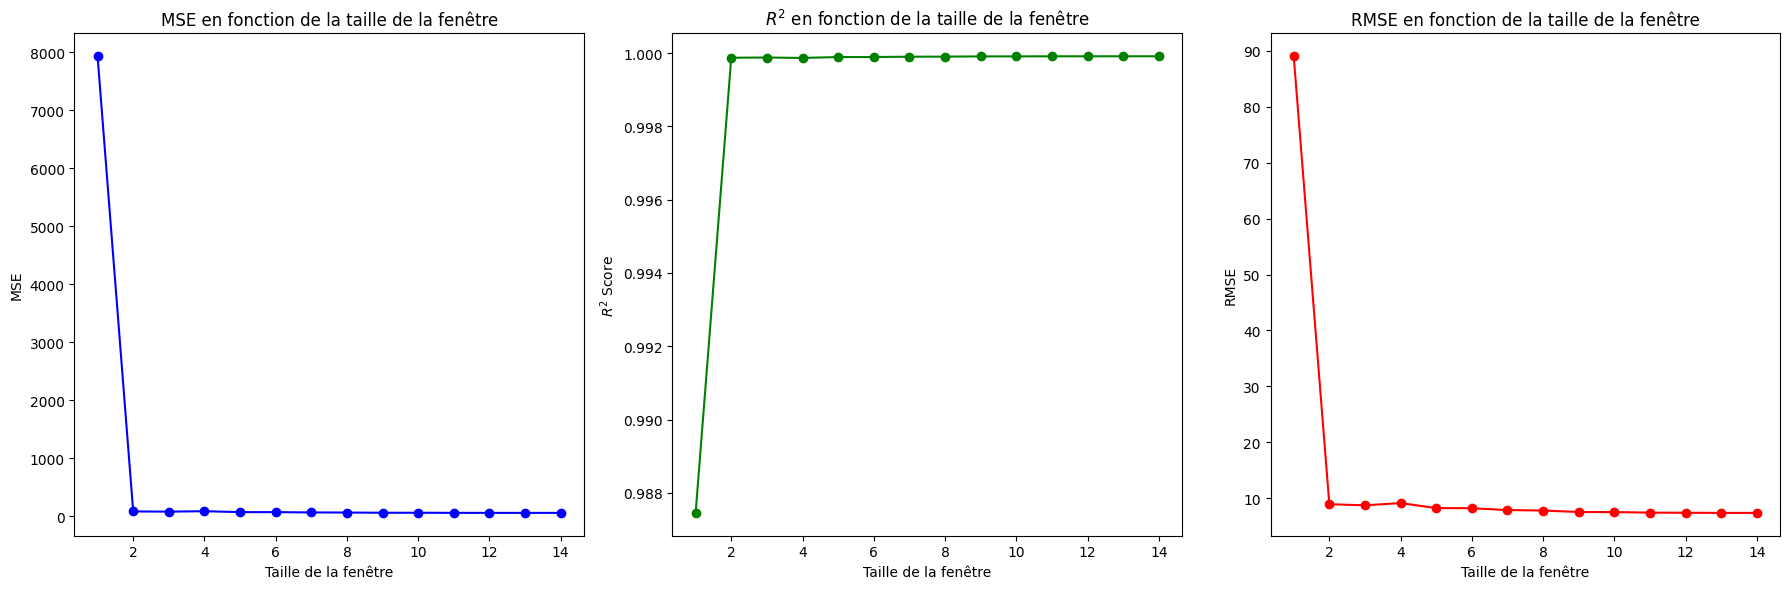

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Créer des listes pour stocker les scores R², RMSE et MSE pour chaque fenêtre
window_sizes = range(1, 15)
r2_scores = []
rmse_scores = []
mse_scores = []

# Boucle sur chaque taille de fenêtre
for window in window_sizes:
    # Décalage de 'el_power' dans les datasets d'entraînement et de test
    combined_dataset[f'el_power_t-{window}'] = combined_dataset['el_power'].shift(window)
    combined_dataset_test[f'el_power_t-{window}'] = combined_dataset_test['el_power'].shift(window)

    # Supprimer les lignes NaN dues aux décalages
    combined_dataset_window = combined_dataset.dropna()
    combined_dataset_test_window = combined_dataset_test.dropna()

    # Sélectionner les caractéristiques et la cible pour chaque fenêtre
    X_train = combined_dataset_window[[f'el_power_t-{i}' for i in range(1, window + 1)]]
    y_train = combined_dataset_window['el_power']
    X_test = combined_dataset_test_window[[f'el_power_t-{i}' for i in range(1, window + 1)]]
    y_test = combined_dataset_test_window['el_power']

    # Initialiser et entraîner le modèle de régression
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prédictions et évaluation
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    rmse_scores.append(np.sqrt(mse))
    r2_scores.append(r2_score(y_test, y_pred))

# Tracer les résultats
plt.figure(figsize=(18, 6))

# Tracé du MSE
plt.subplot(1, 3, 1)
plt.plot(window_sizes, mse_scores, marker='o', color='b')
plt.xlabel('Taille de la fenêtre')
plt.ylabel('MSE')
plt.title('MSE en fonction de la taille de la fenêtre')

# Tracé du R²
plt.subplot(1, 3, 2)
plt.plot(window_sizes, r2_scores, marker='o', color='g')
plt.xlabel('Taille de la fenêtre')
plt.ylabel('$R^2$ Score')
plt.title('$R^2$ en fonction de la taille de la fenêtre')

# Tracé du RMSE
plt.subplot(1, 3, 3)
plt.plot(window_sizes, rmse_scores, marker='o', color='r')
plt.xlabel('Taille de la fenêtre')
plt.ylabel('RMSE')
plt.title('RMSE en fonction de la taille de la fenêtre')

plt.tight_layout()
plt.show()


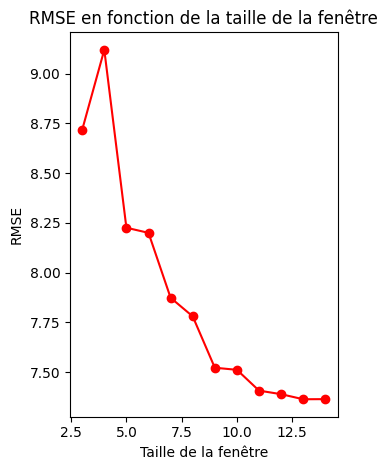

In [ ]:
# Tracé du RMSE
plt.subplot(1, 2, 2)
plt.plot(window_sizes[2:], rmse_scores[2:], marker='o', color='r')
plt.xlabel('Taille de la fenêtre')
plt.ylabel('RMSE')
plt.title('RMSE en fonction de la taille de la fenêtre')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import numpy as np

# Liste des scalers et noms
scalers = {
    "MinMaxScaler": (MinMaxScaler(), X_train, X_test),
    "StandardScaler": (StandardScaler(), X_train, X_test),
    "RobustScaler": (RobustScaler(), X_train, X_test)
}

# Variables pour stocker les meilleurs résultats
best_r2 = -np.inf
best_scaler = None
best_results = {}

# Boucle sur chaque scaler
for scaler_name, (scaler, X_train, X_test) in scalers.items():
    # Appliquer la normalisation
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialiser et entraîner le modèle
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Prédictions
    y_pred = model.predict(X_test_scaled)

    # Calcul des métriques
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Affichage des résultats pour chaque scaler
    print(f"=== Résultats pour {scaler_name} ===")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²: {r2:.4f}\n")

    # Mettre à jour le meilleur score R²
    if r2 > best_r2:
        best_r2 = r2
        best_scaler = scaler_name
        best_results = {
            "MSE": mse,
            "RMSE": rmse,
            "R²": r2
        }

# Afficher les résultats du meilleur scaler
print("=== Meilleur modèle ===")
print(f"Scaler : {best_scaler}")
print(f"MSE : {best_results['MSE']:.4f}")
print(f"RMSE : {best_results['RMSE']:.4f}")
print(f"R² : {best_results['R²']:.4f}")


=== Résultats pour MinMaxScaler ===
  MSE: 90.0756
  RMSE: 9.4908
  R²: 0.9999

=== Résultats pour StandardScaler ===
  MSE: 90.0756
  RMSE: 9.4908
  R²: 0.9999

=== Résultats pour RobustScaler ===
  MSE: 90.0756
  RMSE: 9.4908
  R²: 0.9999

=== Meilleur modèle ===
Scaler : MinMaxScaler
MSE : 90.0756
RMSE : 9.4908
R² : 0.9999


In [ ]:


# Normalisation
scalers = {
    'MinMax': MinMaxScaler(),
    'Standard': StandardScaler(),
    'Robust': RobustScaler()
}

# Appliquer les scalers et stocker les résultats pour comparaison
results = {}
for scale_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Choisir un modèle plus complexe (ici, RandomForest)
    model = RandomForestRegressor(random_state=42)

    # Optimisation des hyperparamètres
    param_grid = {
        'n_estimators': [100, 150, 200],
        'max_depth': [10, 15, 20],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train_scaled, y_train)

    # Prédictions et évaluation
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Stocker les résultats
    results[scale_name] = {
        'Scaler': scale_name,
        'Best Params': grid_search.best_params_,
        'MSE': mse,
        'R2': r2
    }
    print(f"Résultats pour le scaler {scale_name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²: {r2:.4f}\n")

# Afficher les résultats comparatifs
import pandas as pd
df_results = pd.DataFrame(results).T
df_sorted = df_results.sort_values(by=['R2'], ascending=False)
print("\nComparaison des scalers et résultats des modèles optimisés :")
print(df_sorted)


In [ ]:
#4.5.3.2

# Pipeline pour les colonnes numériques (imputation + mise à l'échelle)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Remplir les valeurs manquantes
    ('scaler', StandardScaler())  # Mise à l'échelle des données
])

# Prétraiter les données d'entraînement
X_train_preprocessed = numeric_transformer.fit_transform(X_train)

# Prétraiter les données de test (utiliser les transformations de l'entraînement)
X_test_preprocessed = numeric_transformer.transform(X_test)

# Entraînement du modèle sur les données d'entraînement
model = RandomForestRegressor(random_state=42)
model.fit(X_train_preprocessed, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test_preprocessed)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")



In [13]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [14]:
from catboost import CatBoostRegressor  # Import de CatBoost


# Liste pour stocker les résultats
model_results = []

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir les modèles de régression
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra-Trees": ExtraTreesRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "Multi-Layer Perceptron": MLPRegressor(random_state=42, max_iter=1000),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0),  # Ajout de CatBoost
}

# Fonction pour évaluer les modèles
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Entraîner et évaluer chaque modèle
for name, model in models.items():
    print(f"Entraînement du modèle: {name}")
    model.fit(X_train_scaled, y_train)

    # Prédictions
    y_pred = model.predict(X_test_scaled)

    # Évaluation
    mse, rmse, mae, r2 = evaluate_model(y_test, y_pred)
    print(f"Résultats pour {name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}")
    print("\n" + "="*50 + "\n")

    # Ajouter les résultats dans la liste
    model_results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })

# Convertir les résultats en DataFrame pour les trier
df_results = pd.DataFrame(model_results)

# Trier le DataFrame d'abord par R² Score (descendant) et ensuite par RMSE (ascendant)
df_sorted = df_results.sort_values(by=['R2 Score', 'RMSE'], ascending=[False, True])

# Afficher le tableau trié pour voir le meilleur modèle
print(df_sorted)

# Visualisation du meilleur modèle
print(f"Le meilleur modèle est : {df_sorted.iloc[0]['Model']} avec R² : {df_sorted.iloc[0]['R2 Score']} et RMSE : {df_sorted.iloc[0]['RMSE']}")


Entraînement du modèle: Decision Tree
Résultats pour Decision Tree:
  MSE: 218.1167
  RMSE: 14.7688
  MAE: 10.9666
  R²: 0.9997


Entraînement du modèle: Random Forest
Résultats pour Random Forest:
  MSE: 108.3300
  RMSE: 10.4082
  MAE: 8.0919
  R²: 0.9998


Entraînement du modèle: Extra-Trees
Résultats pour Extra-Trees:
  MSE: 122.3926
  RMSE: 11.0631
  MAE: 8.7062
  R²: 0.9998


Entraînement du modèle: XGBoost
Résultats pour XGBoost:
  MSE: 184.0423
  RMSE: 13.5662
  MAE: 9.9052
  R²: 0.9997


Entraînement du modèle: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 672
[LightGBM] [Info] Number of data points in the train set: 52938, number of used features: 6
[LightGBM] [Info] Start training from score 1843.318233
Résultats pour LightGBM:
  MSE: 141.2607
  RMSE: 11.8853
  

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import pandas as pd

# Vérifier que les données sont normalisées
if X_train.isnull().any().any() or y_train.isnull().any():
    raise ValueError("Les données d'entraînement contiennent des valeurs nulles.")
if X_test.isnull().any().any() or y_test.isnull().any():
    raise ValueError("Les données de test contiennent des valeurs nulles.")

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparamètres à optimiser
param_grids = {
    "Multi-Layer Perceptron": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01]
    }
}

# Fonction d'évaluation
model_results = []

def evaluate_model(y_true, y_pred):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Stocker les meilleurs modèles et leurs résultats
best_models = {}

for name, param_grid in param_grids.items():
    print(f"Optimisation des hyperparamètres pour : {name}")

    # Pipeline pour inclure la normalisation
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('mlp', MLPRegressor(max_iter=2000, random_state=42))
    ])

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid={'mlp__' + k: v for k, v in param_grid.items()},
        cv=3,
        scoring='r2',
        verbose=1
    )

    # Entraînement
    grid_search.fit(X_train, y_train)

    # Meilleurs paramètres
    print(f"Meilleurs paramètres pour {name}: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Prédictions avec le meilleur modèle
    y_pred = best_model.predict(X_test)

    # Évaluation
    mse, rmse, mae, r2 = evaluate_model(y_test, y_pred)
    print(f"\nRésultats optimisés pour {name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}")
    print("\n" + "="*50 + "\n")

    # Ajouter les résultats dans la liste
    model_results.append({
        'Model': name + " (Optimized)",
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })

# Convertir les résultats finaux en DataFrame
df_results_optimized = pd.DataFrame(model_results)

# Trier par les meilleurs R² et MSE
df_results_optimized = df_results_optimized.sort_values(by=['R2 Score', 'MSE'], ascending=[False, True])
print(df_results_optimized)


Optimisation des hyperparamètres pour : Multi-Layer Perceptron
Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.10/dist-pac

In [13]:

from catboost import CatBoostRegressor

# Fonction pour évaluer les modèles
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition des modèles et des espaces d'hyperparamètres
models_and_params = {
    "Decision Tree": (
        DecisionTreeRegressor(random_state=42),
        {
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    ),
    "Random Forest": (
        RandomForestRegressor(random_state=42),
        {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    ),
    "Extra-Trees": (
        ExtraTreesRegressor(random_state=42),
        {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    ),
   "XGBoost": (
       XGBRegressor(random_state=42),
       {
           'n_estimators': [50, 100, 200],
           'learning_rate': [0.01, 0.1, 0.2],
           'max_depth': [3, 6, 10],
           'subsample': [0.7, 1.0],
           'colsample_bytree': [0.7, 1.0]
       }
   ),
   "LightGBM": (
       LGBMRegressor(random_state=42),
       {
           'n_estimators': [50, 100, 200],
           'learning_rate': [0.01, 0.1, 0.2],
           'num_leaves': [20, 31, 50],
           'max_depth': [5, 10, 20]
       }
   ),
    "Multi-Layer Perceptron": (
        MLPRegressor(random_state=42, max_iter=500),
        {
            'hidden_layer_sizes': [(10,), (20,), (50,)],
            'activation': ['relu'],
            'solver': ['adam'],
            'alpha': [0.01, 0.1]
        }
    ),
    "CatBoost": (
        CatBoostRegressor(random_state=42, verbose=0),
        {
            'iterations': [100, 200, 500],
            'depth': [4, 6, 8],
            'learning_rate': [0.01, 0.1, 0.2],
            'l2_leaf_reg': [1, 3, 5]
        }
    )
}

# Stocker les résultats
best_hyperparams = {}
model_results = []

# Recherche des meilleurs hyperparamètres et ajustement des modèles
for name, (model, param_grid) in models_and_params.items():
    print(f"\nRecherche des meilleurs hyperparamètres pour : {name}")

    # Recherche aléatoire avec RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=20,  # Nombre d'itérations pour la recherche aléatoire
        cv=3,  # Validation croisée
        scoring='r2',
        verbose=1,
        random_state=42
    )

    # Ajustement avec les données d'entraînement
    random_search.fit(X_train_scaled, y_train)

    # Enregistrement des meilleurs paramètres
    best_hyperparams[name] = random_search.best_params_
    print(f"Meilleurs hyperparamètres pour {name} : {random_search.best_params_}")

    # Ajustement du modèle avec les meilleurs paramètres
    best_model = random_search.best_estimator_
    best_model.fit(X_train_scaled, y_train)

    # Prédictions et évaluation
    y_pred = best_model.predict(X_test_scaled)
    mse, rmse, mae, r2 = evaluate_model(y_test, y_pred)

    print(f"Résultats pour {name} après tuning :")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}")
    print("="*50)

    # Stocker les résultats
    model_results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })

# Convertir les résultats en DataFrame pour les trier
df_results = pd.DataFrame(model_results)

# Trier par les meilleurs R² et MSE
df_sorted = df_results.sort_values(by=['R2 Score', 'MSE'], ascending=[False, True])
print("\nTableau des résultats trié :")
print(df_sorted)

# Afficher les hyperparamètres optimaux
print("\nMeilleurs hyperparamètres pour chaque modèle :")
for model, params in best_hyperparams.items():
    print(f"{model}: {params}")



Recherche des meilleurs hyperparamètres pour : Decision Tree
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Meilleurs hyperparamètres pour Decision Tree : {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
Résultats pour Decision Tree après tuning :
  MSE: 109.3551
  RMSE: 10.4573
  MAE: 8.1045
  R²: 0.9998

Recherche des meilleurs hyperparamètres pour : Random Forest
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Meilleurs hyperparamètres pour Random Forest : {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Résultats pour Random Forest après tuning :
  MSE: 94.9415
  RMSE: 9.7438
  MAE: 7.6453
  R²: 0.9998

Recherche des meilleurs hyperparamètres pour : Extra-Trees
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Meilleurs hyperparamètres pour Extra-Trees : {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}
Résultats pour Extra-Trees après tuning :
  MSE: 94.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Meilleurs hyperparamètres pour Multi-Layer Perceptron : {'solver': 'adam', 'hidden_layer_sizes': (10,), 'alpha': 0.1, 'activation': 'relu'}
Résultats pour Multi-Layer Perceptron après tuning :
  MSE: 89.8137
  RMSE: 9.4770
  MAE: 7.5054
  R²: 0.9999

Recherche des meilleurs hyperparamètres pour : CatBoost
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Meilleurs hyperparamètres pour CatBoost : {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 500, 'depth': 6}
Résultats pour CatBoost après tuning :
  MSE: 150.5858
  RMSE: 12.2713
  MAE: 9.3700
  R²: 0.9998

Tableau des résultats trié :
                    Model         MSE       RMSE       MAE  R2 Score
5  Multi-Layer Perceptron   89.813721   9.477010  7.505383  0.999858
2             Extra-Trees   94.674534   9.730084  7.635850  0.999850
1           Random Forest   94.941532   9.743795  7.645325  0.999850
0           Decision Tree  109.355116  10.457300  8.104496  0.999827
4                LightGBM  125.643743  11.209

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 52938, number of used features: 4
[LightGBM] [Info] Start training from score 1843.318233


<Figure size 1200x800 with 0 Axes>

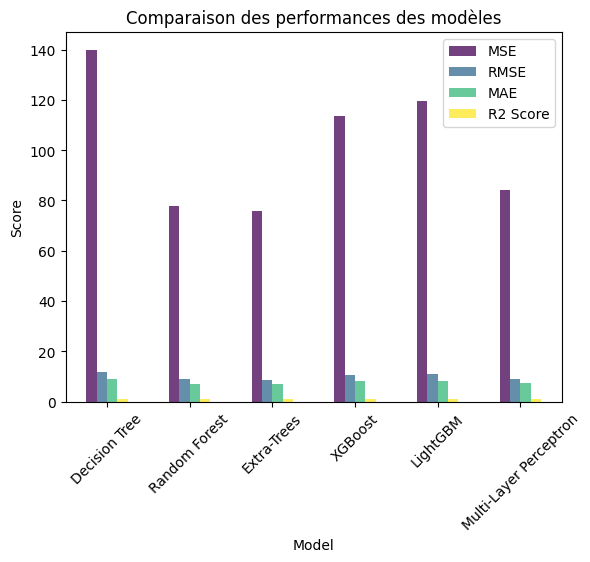

In [ ]:


# Standardisation des données d'entraînement et de test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialisation des modèles
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra-Trees": ExtraTreesRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "Multi-Layer Perceptron": MLPRegressor(random_state=42, max_iter=1000)
}

# Fonction pour évaluer les modèles
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Évaluation des modèles
model_results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse, rmse, mae, r2 = evaluate_model(y_test, y_pred)
    model_results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })

# Création du DataFrame des résultats
df_results = pd.DataFrame(model_results)
df_results.set_index('Model', inplace=True)

# Tracé du graphique combiné
plt.figure(figsize=(12, 8))
df_results.plot(kind='bar', stacked=False, colormap="viridis", alpha=0.75)
plt.title("Comparaison des performances des modèles")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()


In [ ]:
#4.5.4 Supposons que vous avez déjà chargé vos données dans X et y

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_results = []
# Définir les modèles de régression
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra-Trees": ExtraTreesRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "Multi-Layer Perceptron": MLPRegressor(random_state=42, max_iter=1000)
}

# Fonction pour évaluer les modèles
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Entraîner et évaluer chaque modèle
for name, model in models.items():
    print(f"Entraînement du modèle: {name}")
    model.fit(X_train_scaled, y_train)

    # Prédictions
    y_pred = model.predict(X_test_scaled)

    # Évaluation
    mse, rmse, mae, r2 = evaluate_model(y_test, y_pred)
    print(f"Résultats pour {name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}")
    print("\n" + "="*50 + "\n")
  # Ajouter les résultats dans la liste
    model_results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })


# Convertir les résultats en DataFrame pour les trier
df_results = pd.DataFrame(model_results)

# Trier le DataFrame d'abord par R² Score (descendant) et ensuite par RMSE (ascendant)
df_sorted = df_results.sort_values(by=['R2 Score', 'RMSE'], ascending=[False, True])

# Afficher le tableau trié pour voir le meilleur modèle
print(df_sorted)

# Visualisation du meilleur modèle
print(f"Le meilleur modèle est : {df_sorted.iloc[0]['Model']} avec paramètres : {df_sorted.iloc[0]['R2 Score', 'RMSE']}")

In [15]:
# 4.5.5 & 4.5.6

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir les modèles de régression
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra-Trees": ExtraTreesRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "Multi-Layer Perceptron": MLPRegressor(random_state=42, max_iter=1000)
}

# Fonction pour évaluer les modèles
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Liste pour stocker les résultats des modèles
model_results = []

# Entraîner et évaluer chaque modèle
for name, model in models.items():
    print(f"Entraînement du modèle: {name}")
    model.fit(X_train_scaled, y_train)

    # Prédictions
    y_pred = model.predict(X_test_scaled)

    # Évaluation
    mse, rmse, mae, r2 = evaluate_model(y_test, y_pred)
    print(f"Résultats pour {name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}")
    print("\n" + "="*50 + "\n")

    # Ajouter les résultats dans la liste
    model_results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })

# Convertir les résultats en DataFrame pour les trier
df_results = pd.DataFrame(model_results)

# Trier le DataFrame d'abord par R² Score (descendant) et ensuite par RMSE (ascendant)
df_sorted = df_results.sort_values(by=['R2 Score', 'RMSE'], ascending=[False, True])

# Afficher le tableau trié pour voir le meilleur modèle
print(df_sorted)

# Visualisation du meilleur modèle
print(f"Le meilleur modèle est : {df_sorted.iloc[0]['Model']}")


Entraînement du modèle: Decision Tree
Résultats pour Decision Tree:
  MSE: 218.1167
  RMSE: 14.7688
  MAE: 10.9666
  R²: 0.9997


Entraînement du modèle: Random Forest
Résultats pour Random Forest:
  MSE: 108.3300
  RMSE: 10.4082
  MAE: 8.0919
  R²: 0.9998


Entraînement du modèle: Extra-Trees
Résultats pour Extra-Trees:
  MSE: 122.3926
  RMSE: 11.0631
  MAE: 8.7062
  R²: 0.9998


Entraînement du modèle: XGBoost
Résultats pour XGBoost:
  MSE: 184.0423
  RMSE: 13.5662
  MAE: 9.9052
  R²: 0.9997


Entraînement du modèle: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 672
[LightGBM] [Info] Number of data points in the train set: 52938, number of used features: 6
[LightGBM] [Info] Start training from score 1843.318233
Résultats pour LightGBM:
  MSE: 141.2607
  RMSE: 11.8853
  

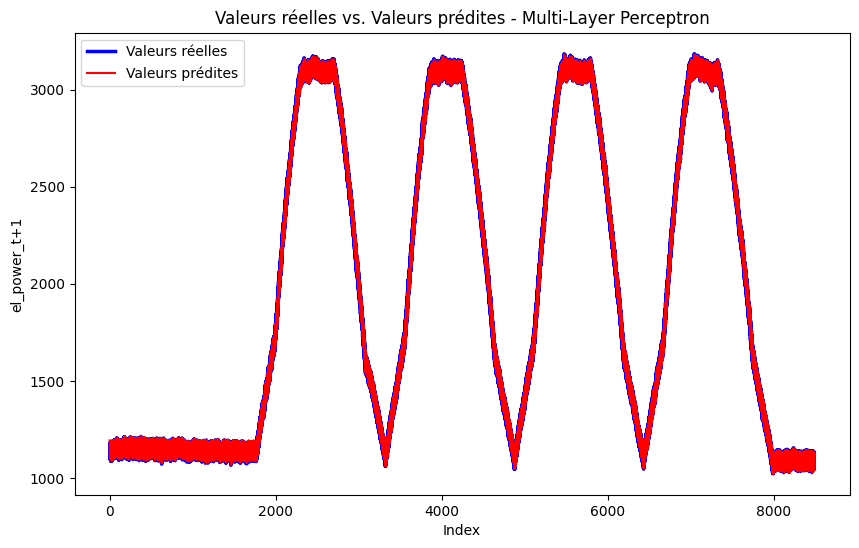

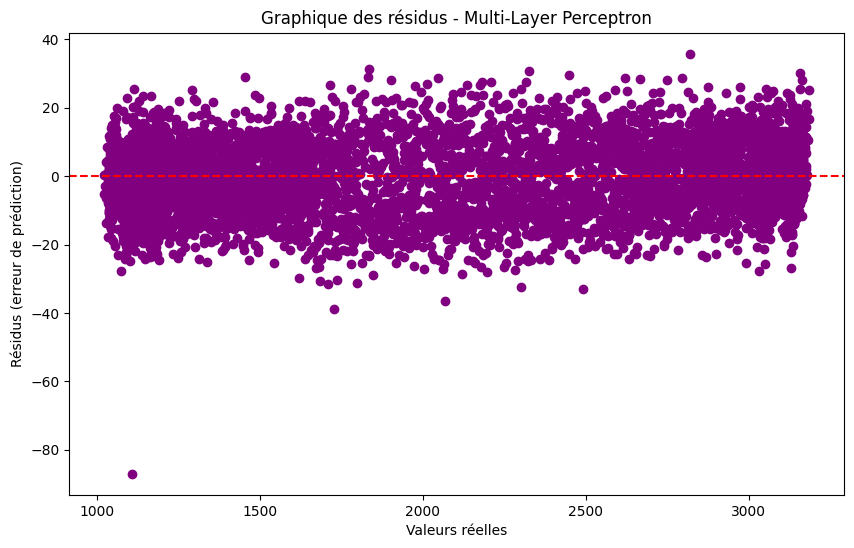

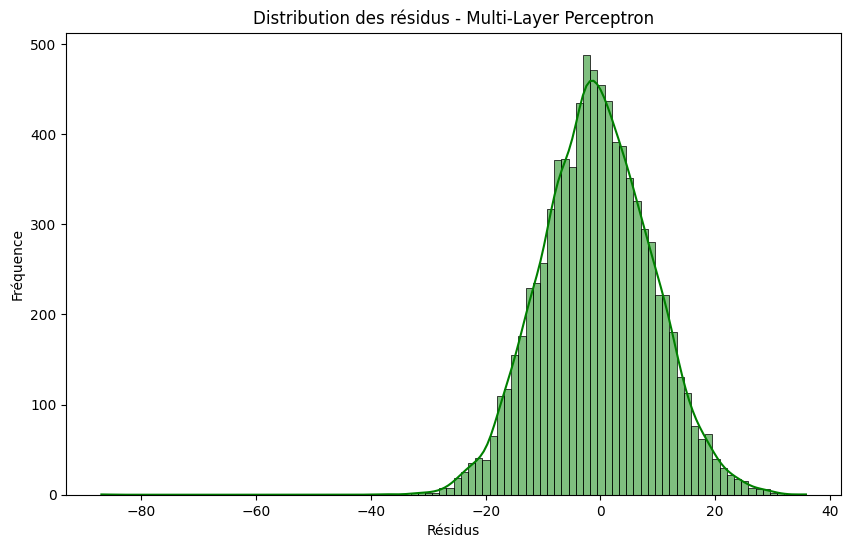

In [26]:
#4.5.7

# Sélectionner le meilleur modèle
best_model_name = df_sorted.iloc[0]['Model']
best_model = models[best_model_name]

# Réentraîner le meilleur modèle (si nécessaire)
best_model.fit(X_train_scaled, y_train)

# Prédictions avec le meilleur modèle
y_pred_best = best_model.predict(X_test_scaled)

# 1. Graphique des valeurs réelles vs. valeurs prédites
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valeurs réelles', color='b',linewidth=2.5)
plt.plot(y_pred_best, label='Valeurs prédites', color='r')

plt.title(f"Valeurs réelles vs. Valeurs prédites - {best_model_name}")
plt.xlabel('Index')
plt.ylabel('el_power_t+1')
plt.legend()
plt.show()

# 2. Graphique des résidus (erreurs de prédiction)
residuals = y_test - y_pred_best

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.title(f"Graphique des résidus - {best_model_name}")
plt.xlabel('Valeurs réelles')
plt.ylabel('Résidus (erreur de prédiction)')
plt.show()

# 3. Distribution des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='g')
plt.title(f"Distribution des résidus - {best_model_name}")
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()


In [ ]:
#4.5.8
# Définir une grille d'hyperparamètres
#Recherche en grille (Grid Search)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser le modèle
rf = RandomForestRegressor(random_state=42)

# Grid Search avec validation croisée
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Entraînement et ajustement
grid_search.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres (Grid Search):", grid_search.best_params_)
print("Meilleur score (Grid Search):", np.sqrt(-grid_search.best_score_))




In [ ]:
# Définir la distribution des hyperparamètres
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Random Search avec validation croisée
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Entraînement et ajustement
random_search.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres (Random Search):", random_search.best_params_)
print("Meilleur score (Random Search):", np.sqrt(-random_search.best_score_))


In [ ]:
!pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 8.4 MB/s eta 0:00:00


In [ ]:

from skopt import BayesSearchCV
# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Vérification et remplacement des NaN et Inf dans les données d'entraînement
X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=1e6, neginf=-1e6)
y_train = np.nan_to_num(y_train, nan=0.0, posinf=1e6, neginf=-1e6)

# Ou bien utilisez un imputeur pour remplacer les NaN
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)

# Définir la grille d'hyperparamètres pour l'optimisation bayésienne
param_bayes = {
    'n_estimators': (100, 400),
    'max_depth': (10, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}

# Initialiser le modèle (Random Forest)
rf = RandomForestRegressor(random_state=42)

# Initialiser BayesSearchCV pour l'optimisation bayésienne
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_bayes, n_iter=32, cv=5,
                             scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Entraînement et ajustement
bayes_search.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres (Optimisation Bayésienne):", bayes_search.best_params_)
print("Meilleur score (Optimisation Bayésienne - RMSE):", np.sqrt(-bayes_search.best_score_))

# Évaluer les performances du modèle optimisé sur les données de test
X_test_scaled = scaler.transform(X_test)
y_test_pred = bayes_search.best_estimator_.predict(X_test_scaled)

# Calculer les métriques sur les données de test
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Résultats sur les données de test :")
print(f"  MSE: {mse_test:.4f}")
print(f"  RMSE: {rmse_test:.4f}")
print(f"  MAE: {mae_test:.4f}")
print(f"  R²: {r2_test:.4f}")



In [ ]:
#4.5.9 from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fonction d'évaluation
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Définir les modèles de régression (non ajustés)
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra-Trees": ExtraTreesRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "Multi-Layer Perceptron": MLPRegressor(random_state=42, max_iter=1000)
}

# Evaluation des modèles non ajustés
print("Évaluation des modèles non ajustés")
non_adjusted_results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse, rmse, mae, r2 = evaluate_model(y_test, y_pred)

    non_adjusted_results.append({
        "Modèle": name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })

    print(f"Résultats pour {name} (non ajusté):")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}")
    print("\n" + "="*50 + "\n")


# Optimisation des hyperparamètres pour RandomForest (Exemple d'ajustement avec Grid Search)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Prédictions avec le modèle ajusté
y_pred_optimized = grid_search.best_estimator_.predict(X_test_scaled)

# Évaluation du modèle ajusté
mse, rmse, mae, r2 = evaluate_model(y_test, y_pred_optimized)

# Affichage des résultats du modèle ajusté
print("Évaluation du modèle Random Forest ajusté")
print(f"Meilleurs hyperparamètres (Random Forest ajusté): {grid_search.best_params_}")
print(f"  MSE: {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"  R²: {r2:.4f}")
print("\n" + "="*50 + "\n")


In [ ]:
!pip install catboost;


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.4 MB/s eta 0:00:00


In [ ]:
#4.5.9 version test
from catboost import CatBoostRegressor, Pool

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fonction d'évaluation
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Définir les modèles de régression (non ajustés)
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra-Trees": ExtraTreesRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Multi-Layer Perceptron": MLPRegressor(random_state=42, max_iter=1000),
    "catboost": CatBoostRegressor(random_state=42, verbose=0)
}

# Évaluation des modèles non ajustés
print("Évaluation des modèles non ajustés")
non_adjusted_results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse, rmse, mae, r2 = evaluate_model(y_test, y_pred)

    non_adjusted_results.append({
        "Modèle": name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })

    print(f"Résultats pour {name} (non ajusté):")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}")
    print("\n" + "="*50 + "\n")

# Optimisation des hyperparamètres pour RandomForest (Exemple d'ajustement avec Grid Search)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Prédictions avec le modèle ajusté
y_pred_optimized = grid_search.best_estimator_.predict(X_test_scaled)

# Évaluation du modèle ajusté
mse, rmse, mae, r2 = evaluate_model(y_test, y_pred_optimized)

# Affichage des résultats du modèle ajusté
print("Évaluation du modèle Random Forest ajusté")
print(f"Meilleurs hyperparamètres (Random Forest ajusté): {grid_search.best_params_}")
print(f"  MSE: {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"  R²: {r2:.4f}")
print("\n" + "="*50 + "\n")

# Comparer les performances ajustées et non ajustées pour d'autres modèles si nécessaire
# Vous pouvez répéter l'optimisation pour les autres modèles avec des méthodes similaires

In [ ]:
#4.6.1
"""1. Concepts et avantages des techniques d’ensemble
Vote (Voting Ensemble) : Combine plusieurs modèles pour prendre une décision finale via un vote (pour des problèmes de classification). Il existe deux types de votes :

Vote majoritaire (hard voting) : Chaque modèle vote pour une classe et la classe qui obtient le plus de votes est choisie.
Vote pondéré (soft voting) : Les probabilités prédites par chaque modèle sont combinées et la classe avec la probabilité la plus élevée est choisie.
Avantage : Le vote peut améliorer la robustesse et la précision, surtout si les modèles individuels sont différents.

Bagging (Bootstrap Aggregating) : Cette méthode crée plusieurs échantillons de l’ensemble de données avec remplacement, puis entraîne un modèle séparé sur chaque échantillon. Le résultat final est obtenu en combinant les prédictions (par exemple, avec une moyenne pour la régression ou un vote pour la classification). Exemple : Random Forest.

Avantage : Le bagging réduit la variance et le surapprentissage (overfitting) des modèles, améliorant leur stabilité.

Stacking (Stacked Generalization) : Combine plusieurs modèles en utilisant un modèle de niveau supérieur (meta-model) pour apprendre à partir des prédictions de ces modèles de base. Par exemple, plusieurs régressions ou arbres de décision peuvent être utilisés, et leurs sorties sont ensuite passées à un autre modèle (comme une régression logistique).

Avantage : Le stacking permet de capturer des relations plus complexes et d'améliorer les performances en exploitant les forces de différents modèles."""


In [18]:
#4.6.2

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor, BaggingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fonction d'évaluation
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Modèles de base pour Stacking et Voting
base_models = [('lr', LinearRegression()), ('tree', DecisionTreeRegressor()), ('svr', SVR())]

# 1. Modèle Bagging
bagging_model = BaggingRegressor(DecisionTreeRegressor(), n_estimators=50, random_state=42)
bagging_model.fit(X_train_scaled, y_train)
y_pred_bagging = bagging_model.predict(X_test_scaled)

# Évaluation du modèle Bagging
mse_bagging, rmse_bagging, mae_bagging, r2_bagging = evaluate_model(y_test, y_pred_bagging)
print("Résultats Bagging:")
print(f"  MSE: {mse_bagging:.4f}")
print(f"  RMSE: {rmse_bagging:.4f}")
print(f"  MAE: {mae_bagging:.4f}")
print(f"  R²: {r2_bagging:.4f}")
print("\n" + "="*50 + "\n")

# 2. Modèle Stacking
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
stacking_model.fit(X_train_scaled, y_train)
y_pred_stacking = stacking_model.predict(X_test_scaled)

# Évaluation du modèle Stacking
mse_stacking, rmse_stacking, mae_stacking, r2_stacking = evaluate_model(y_test, y_pred_stacking)
print("Résultats Stacking:")
print(f"  MSE: {mse_stacking:.4f}")
print(f"  RMSE: {rmse_stacking:.4f}")
print(f"  MAE: {mae_stacking:.4f}")
print(f"  R²: {r2_stacking:.4f}")
print("\n" + "="*50 + "\n")

# 3. Modèle Voting
voting_model = VotingRegressor(estimators=base_models)
voting_model.fit(X_train_scaled, y_train)
y_pred_voting = voting_model.predict(X_test_scaled)

# Évaluation du modèle Voting
mse_voting, rmse_voting, mae_voting, r2_voting = evaluate_model(y_test, y_pred_voting)
print("Résultats Voting:")
print(f"  MSE: {mse_voting:.4f}")
print(f"  RMSE: {rmse_voting:.4f}")
print(f"  MAE: {mae_voting:.4f}")
print(f"  R²: {r2_voting:.4f}")
print("\n" + "="*50 + "\n")




Résultats Bagging:
  MSE: 111.5670
  RMSE: 10.5625
  MAE: 8.2089
  R²: 0.9998


Résultats Stacking:
  MSE: 89.7801
  RMSE: 9.4752
  MAE: 7.5139
  R²: 0.9999


Résultats Voting:
  MSE: 423.0881
  RMSE: 20.5691
  MAE: 16.0575
  R²: 0.9993




In [ ]:
#4.6.2#with hyperparameter

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# GridSearch pour Bagging Regressor
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}
grid_bagging = GridSearchCV(estimator=BaggingRegressor(random_state=42), param_grid=param_grid_bagging, cv=5)
grid_bagging.fit(X_train_scaled, y_train)
y_pred_bagging_grid = grid_bagging.best_estimator_.predict(X_test_scaled)

# GridSearch pour Stacking Regressor
param_grid_stacking = {
    'final_estimator__fit_intercept': [True, False]
}
stacking_model = StackingRegressor(estimators=[('lr', LinearRegression()), ('tree', DecisionTreeRegressor()), ('svr', SVR())], final_estimator=LinearRegression())
grid_stacking = GridSearchCV(estimator=stacking_model, param_grid=param_grid_stacking, cv=5)
grid_stacking.fit(X_train_scaled, y_train)
y_pred_stacking_grid = grid_stacking.best_estimator_.predict(X_test_scaled)

# GridSearch pour Voting Regressor
param_grid_voting = {}
voting_model = VotingRegressor(estimators=[('lr', LinearRegression()), ('tree', DecisionTreeRegressor()), ('svr', SVR())])
voting_model.fit(X_train_scaled, y_train)
y_pred_voting = voting_model.predict(X_test_scaled)

# Pas de GridSearch spécifique pour Voting Regressor





In [ ]:
#4.6.3


# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fonction d'évaluation des performances
def evaluate_performance_regression(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Prédictions des modèles non ajustés
y_pred_bagging = bagging_model.predict(X_test_scaled)
y_pred_stacking = stacking_model.predict(X_test_scaled)
y_pred_voting = voting_model.predict(X_test_scaled)

# Prédictions des modèles ajustés avec GridSearch
y_pred_bagging_grid = grid_bagging.best_estimator_.predict(X_test_scaled)
y_pred_stacking_grid = grid_stacking.best_estimator_.predict(X_test_scaled)

# Modèles non ajustés
models_non_adjusted = {
    "Bagging": y_pred_bagging,
    "Stacking": y_pred_stacking,
    "Voting": y_pred_voting
}

# Modèles ajustés
models_adjusted = {
    "Bagging (Grid)": y_pred_bagging_grid,
    "Stacking (Grid)": y_pred_stacking_grid,
}

# Comparaison des modèles non ajustés
for model_name, y_pred in models_non_adjusted.items():
    mae, mse, rmse, r2 = evaluate_performance_regression(y_test, y_pred)
    print(f"Performance du modèle non ajusté {model_name}:")
    print(f"  MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    print("=" * 50)

# Comparaison des modèles ajustés
for model_name, y_pred in models_adjusted.items():
    mae, mse, rmse, r2 = evaluate_performance_regression(y_test, y_pred)
    print(f"Performance du modèle ajusté {model_name}:")
    print(f"  MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    print("=" * 50)



In [ ]:
#4.6.3
import matplotlib.pyplot as plt


"""Conclusion :
Sans ajustement des hyperparamètres : Les modèles d'ensemble offrent déjà de bonnes performances grâce à leur capacité à combiner plusieurs modèles de base.
Avec ajustement des hyperparamètres : L'optimisation des hyperparamètres peut apporter des améliorations marginales, mais cela dépend de la nature des données et du modèle utilisé.
Les modèles d'ensemble peuvent surpasser des modèles individuels, et l'ajustement des hyperparamètres aide à affiner ces gains."""

In [ ]:
#4.6.4
# Sélectionner les caractéristiques et la cible pour l'entraînement et le test

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fonction d'évaluation des performances
def evaluate_performance_regression(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Prédictions des modèles non ajustés
y_pred_bagging = bagging_model.predict(X_test_scaled)
y_pred_stacking = stacking_model.predict(X_test_scaled)
y_pred_voting = voting_model.predict(X_test_scaled)

# Prédictions des modèles ajustés avec GridSearch
y_pred_bagging_grid = grid_bagging.best_estimator_.predict(X_test_scaled)
y_pred_stacking_grid = grid_stacking.best_estimator_.predict(X_test_scaled)

# Modèles non ajustés
models_non_adjusted = {
    "Bagging": y_pred_bagging,
    "Stacking": y_pred_stacking,
    "Voting": y_pred_voting
}

# Modèles ajustés
models_adjusted = {
    "Bagging (Grid)": y_pred_bagging_grid,
    "Stacking (Grid)": y_pred_stacking_grid,
}

# Comparaison des modèles non ajustés
for model_name, y_pred in models_non_adjusted.items():
    mae, mse, rmse, r2 = evaluate_performance_regression(y_test, y_pred)
    print(f"Performance du modèle non ajusté {model_name}:")
    print(f"  MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    print("=" * 50)

# Comparaison des modèles ajustés
for model_name, y_pred in models_adjusted.items():
    mae, mse, rmse, r2 = evaluate_performance_regression(y_test, y_pred)
    print(f"Performance du modèle ajusté {model_name}:")
    print(f"  MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    print("=" * 50)

    print("=" * 50)

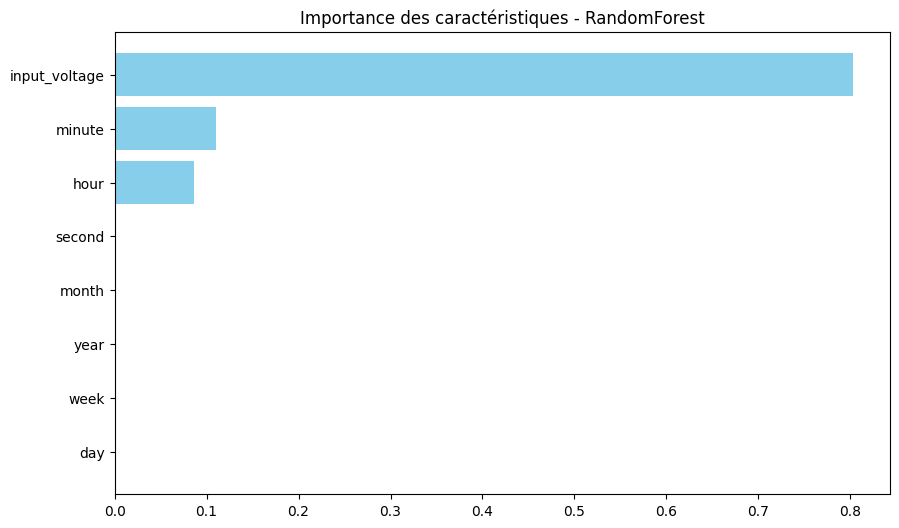

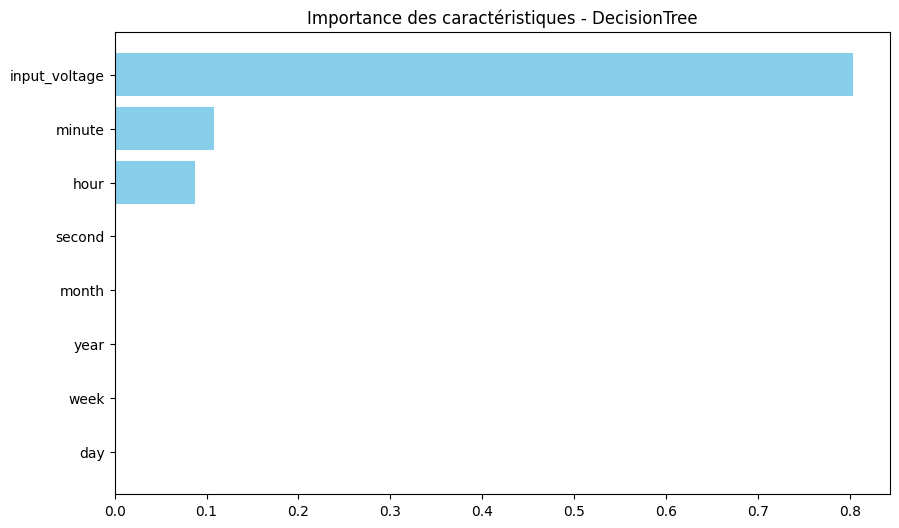

In [ ]:
#4.6.5
# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement du modèle RandomForest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Entraînement du modèle DecisionTree
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

# Fonction pour afficher les scores d'importance des caractéristiques
def plot_feature_importance(model, feature_names, model_name):
    importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    # Visualisation de l'importance des caractéristiques
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.title(f'Importance des caractéristiques - {model_name}')
    plt.gca().invert_yaxis()
    plt.show()

# Modèles individuels (RandomForest et DecisionTree)
plot_feature_importance(random_forest_model, X_train.columns, "RandomForest")
plot_feature_importance(decision_tree_model, X_train.columns, "DecisionTree")




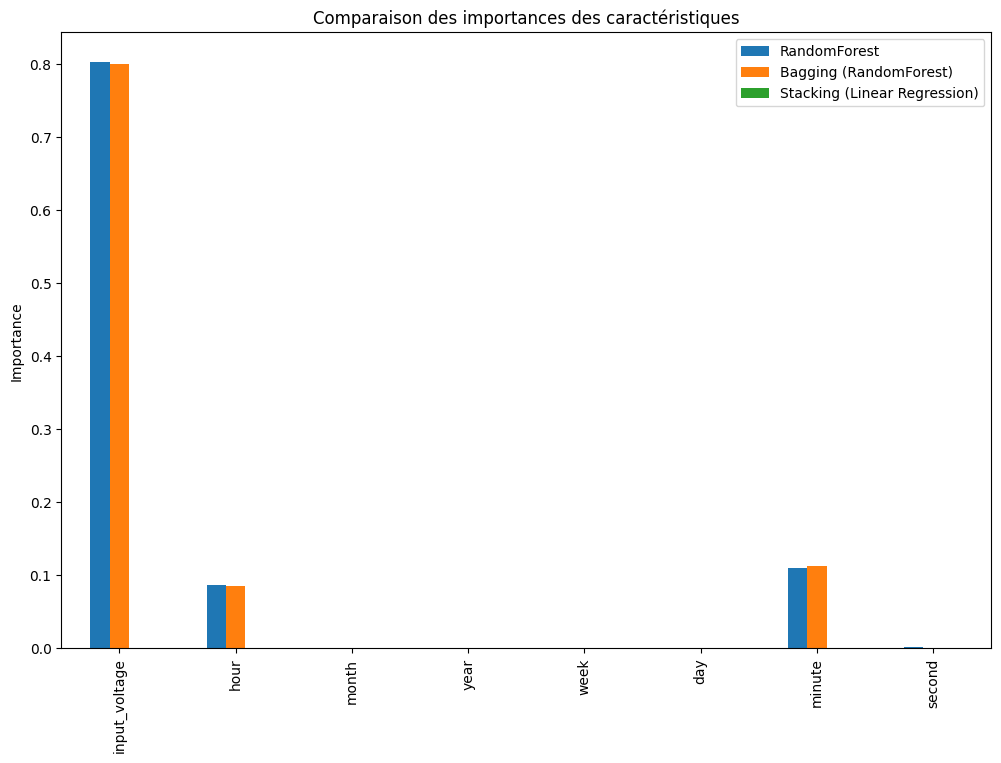

In [ ]:
# Comparer les importances pour plusieurs modèles
import numpy as np

def compare_feature_importances(models, model_names, feature_names):
    importances = []

    for model in models:
        if hasattr(model, 'feature_importances_'):
            importances.append(model.feature_importances_)
        else:
            importances.append(np.zeros(len(feature_names)))  # Si le modèle n'a pas d'importance des features

    importance_df = pd.DataFrame(importances, index=model_names, columns=feature_names).T
    importance_df.plot(kind='bar', figsize=(12, 8))
    plt.title("Comparaison des importances des caractéristiques")
    plt.ylabel("Importance")
    plt.show()

# Comparer Bagging et Stacking avec un modèle individuel
compare_feature_importances([random_forest_model, bagging_model.estimators_[0], stacking_model.final_estimator_],
                            ['RandomForest', 'Bagging (RandomForest)', 'Stacking (Linear Regression)'],
                            X_train.columns)


In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.8 MB/s eta 0:00:00


In [ ]:
#4.5.6
import shap

# Créer un explainer SHAP pour un modèle de type RandomForest
explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(X_test_scaled)

# Visualiser les SHAP values
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)

# Pour le stacking (si le modèle final est basé sur une régression ou des arbres)
explainer_stack = shap.KernelExplainer(stacking_model.final_estimator_.predict, X_train_scaled)
shap_values_stack = explainer_stack.shap_values(X_test_scaled)
shap.summary_plot(shap_values_stack, X_test_scaled, feature_names=X_test.columns)



Entraînement du modèle Stacking...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 876
[LightGBM] [Info] Number of data points in the train set: 52938, number of used features: 8
[LightGBM] [Info] Start training from score 1843.318233
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 876
[LightGBM] [Info] Number of data points in the train set: 42350, number of used features: 8
[LightGBM] [Info] Start training from score 1778.881871
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001296 seconds.
You can set `force_row_wise=true` to remove the

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Résultats du modèle Stacking:
  MSE: 179.8006
  RMSE: 13.4090
  MAE: 10.1018
  R²: 0.9997
Entraînement du modèle de base: Decision Tree
Entraînement du modèle de base: Random Forest
Entraînement du modèle de base: Extra-Trees
Entraînement du modèle de base: XGBoost
Entraînement du modèle de base: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 876
[LightGBM] [Info] Number of data points in the train set: 52938, number of used features: 8
[LightGBM] [Info] Start training from score 1843.318233
Entraînement du modèle de base: MLP


<Figure size 1200x800 with 0 Axes>

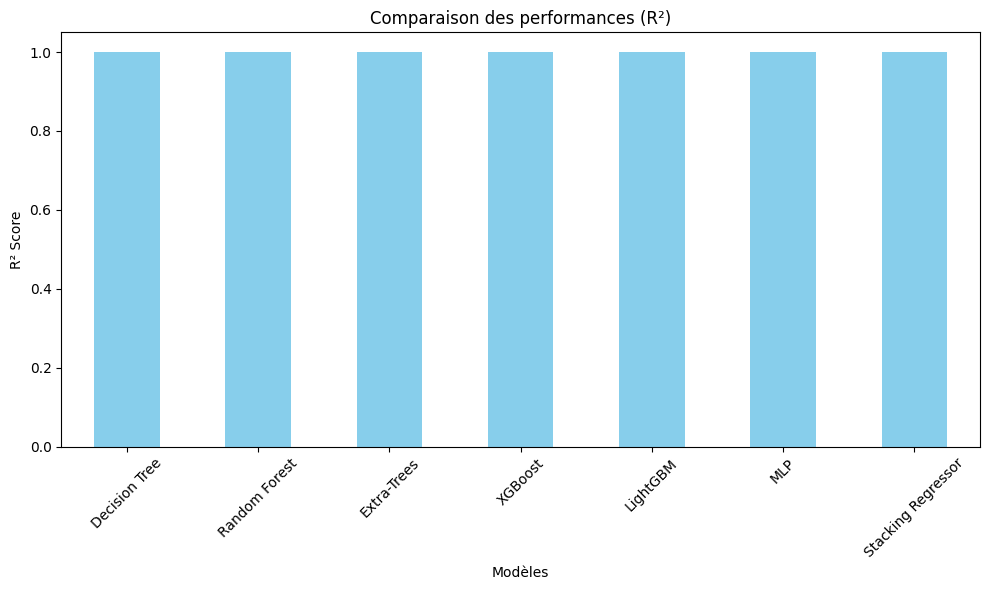

In [ ]:

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir les modèles pour le stacking
base_learners = [
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Extra-Trees", ExtraTreesRegressor(random_state=42)),
    ("XGBoost", XGBRegressor(random_state=42)),
    ("LightGBM", LGBMRegressor(random_state=42)),
    ("MLP", MLPRegressor(random_state=42, max_iter=1000))
]

# Modèle final (meta-model)
meta_model = Ridge(alpha=1.0)

# Création du modèle de stacking
stacking_regressor = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

# Entraînement du modèle de stacking
print("Entraînement du modèle Stacking...")
stacking_regressor.fit(X_train_scaled, y_train)

# Prédictions
y_pred = stacking_regressor.predict(X_test_scaled)

# Évaluation des performances
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Résultats
print("Résultats du modèle Stacking:")
print(f"  MSE: {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"  R²: {r2:.4f}")

# Comparaison avec les modèles de base
model_results = []

# Évaluation des modèles de base
for name, model in base_learners:
    print(f"Entraînement du modèle de base: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred_base = model.predict(X_test_scaled)
    mse_base = mean_squared_error(y_test, y_pred_base)
    rmse_base = np.sqrt(mse_base)
    mae_base = mean_absolute_error(y_test, y_pred_base)
    r2_base = r2_score(y_test, y_pred_base)
    model_results.append({
        'Model': name,
        'MSE': mse_base,
        'RMSE': rmse_base,
        'MAE': mae_base,
        'R2 Score': r2_base
    })

# Ajout des résultats du stacking
model_results.append({
    'Model': "Stacking Regressor",
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae,
    'R2 Score': r2
})

# Conversion des résultats en DataFrame
df_results = pd.DataFrame(model_results)

# Tracer les performances
plt.figure(figsize=(12, 8))
df_results[['Model', 'R2 Score']].set_index('Model').plot(
    kind='bar', figsize=(10, 6), color='skyblue', legend=False, rot=45)
plt.title("Comparaison des performances (R²)")
plt.ylabel("R² Score")
plt.xlabel("Modèles")
plt.tight_layout()
plt.show()
